In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, jaccard_score, roc_auc_score, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib
import joblib
from sklearn.decomposition import SparsePCA, PCA
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


path_parent = os.path.dirname(os.getcwd())
data_dir = os.path.join(path_parent,'data')
model_dir = os.path.join(path_parent,'models')
processed_dir = os.path.join(data_dir,'processed')
df_audsome = pd.read_csv(os.path.join(processed_dir,"anomaly_anotated_audsome.csv"))

In [2]:
df_audsome.columns
# print("Checking low variance columns ...")
# print("Starting Clean dataset")
# uniques = df_audsome.apply(lambda x: x.nunique())
# rm_columns = []
# for uindex, uvalue in uniques.iteritems():
#     if uvalue == 1:
#         rm_columns.append(uindex)
# print(rm_columns)

Index(['node_context_switches_total_10.211.55.101:9100',
       'node_cpu_seconds_total_10.211.55.101:9100',
       'node_entropy_available_bits_10.211.55.101:9100',
       'node_filefd_allocated_10.211.55.101:9100',
       'node_filesystem_avail_bytes_10.211.55.101:9100',
       'node_filesystem_free_bytes_10.211.55.101:9100',
       'node_forks_total_10.211.55.101:9100',
       'node_intr_total_10.211.55.101:9100', 'node_load1_10.211.55.101:9100',
       'node_load15_10.211.55.101:9100', 'node_load5_10.211.55.101:9100',
       'node_memory_Active_anon_bytes_10.211.55.101:9100',
       'node_memory_Active_bytes_10.211.55.101:9100',
       'node_memory_Active_file_bytes_10.211.55.101:9100',
       'node_memory_AnonHugePages_bytes_10.211.55.101:9100',
       'node_memory_AnonPages_bytes_10.211.55.101:9100',
       'node_memory_Buffers_bytes_10.211.55.101:9100',
       'node_memory_Cached_bytes_10.211.55.101:9100',
       'node_memory_Committed_AS_bytes_10.211.55.101:9100',
       'node_

In [3]:
print("Dataset chosen ...")
data = df_audsome
# drop_col = ['t1','t2','t3','t4']
drop_col = ['t1','t2','t3','t4',
'node_time_seconds_10.211.55.101:9100',
'node_context_switches_total_10.211.55.101:9100',
'node_forks_total_10.211.55.101:9100',
'node_intr_total_10.211.55.101:9100',
'node_entropy_available_bits_10.211.55.101:9100',
'node_cpu_seconds_total_10.211.55.101:9100']
print("Remove unwanted columns ...")
print("Shape before drop: {}".format(data.shape))
data.drop(drop_col, axis=1, inplace=True)
print("Shape after drop: {}".format(data.shape))

Dataset chosen ...
Remove unwanted columns ...
Shape before drop: (3900, 67)
Shape after drop: (3900, 57)


In [4]:
# Nice print
nice_y = data['target']

# Uncomment for removing dummy
print("Removed Dummy class")
data.loc[data.target == "dummy", 'target'] = "0"
# Uncomment for removing cpu
data.loc[data.target == "cpu", 'target'] = "0"
# Uncomment for removing copy
data.loc[data.target == "copy", 'target'] = "0"

# Uncomment for manual factorize mem
data.loc[data.target == "mem", 'target'] = 1
# Print new unique columns
print(data['target'].unique())

Removed Dummy class
['0' 1]


In [5]:
# time = data.drop('time', axis=1)
X = data.drop('target', axis=1)
y = data['target']
# print(y)

Initial shape: (3900, 56)
PCA data shape: (3900, 2)


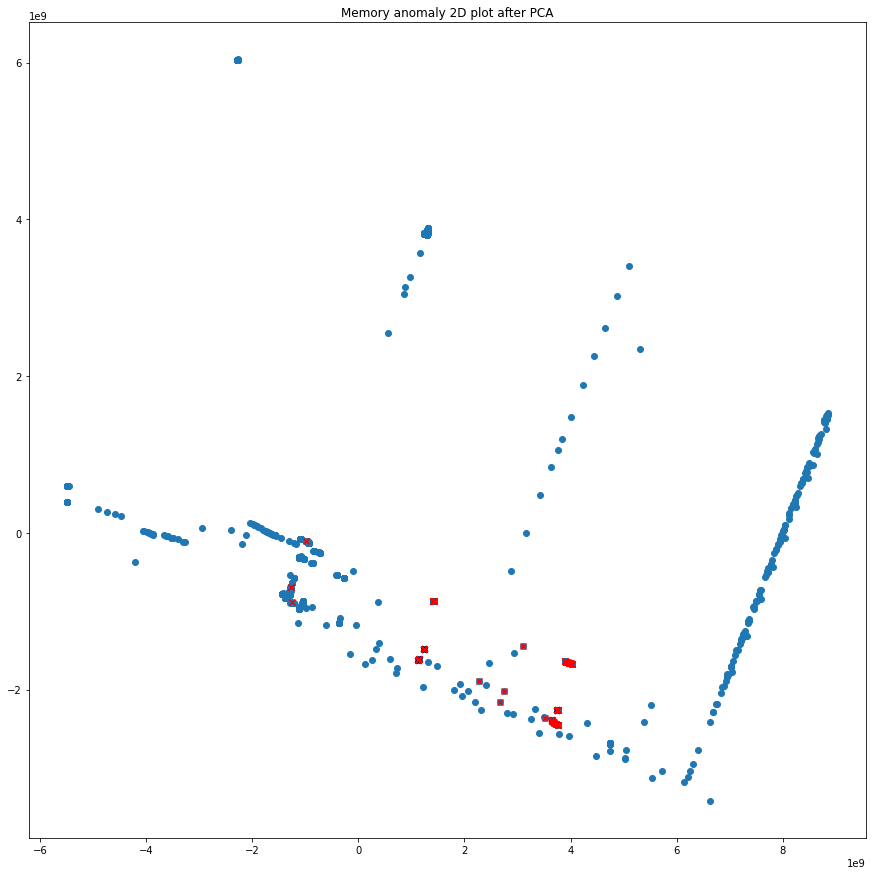

In [6]:
# 2D anomaly visualization PCA

# Get anomaly index and the values based on said index
anomaly_index_rf = np.where(y==1)
# print(anomaly_index_rf)
transformer = PCA(n_components=2)
transformer.fit(X)
X_transformed = transformer.transform(X)
print("Initial shape: {}".format(X.shape))
print("PCA data shape: {}".format(X_transformed.shape))
dataset_rf  = X_transformed

# Get anomalies based on index
values_rf = dataset_rf[anomaly_index_rf]
#Plot prediction on 2d
fig = plt.figure(figsize=(15,15))
plt.scatter(dataset_rf[:,0], dataset_rf[:,1])
plt.scatter(values_rf[:,0], values_rf[:,1], color='r', marker='x')
plt.title("Memory anomaly 2D plot after PCA")
plt.show()

(3900, 3)


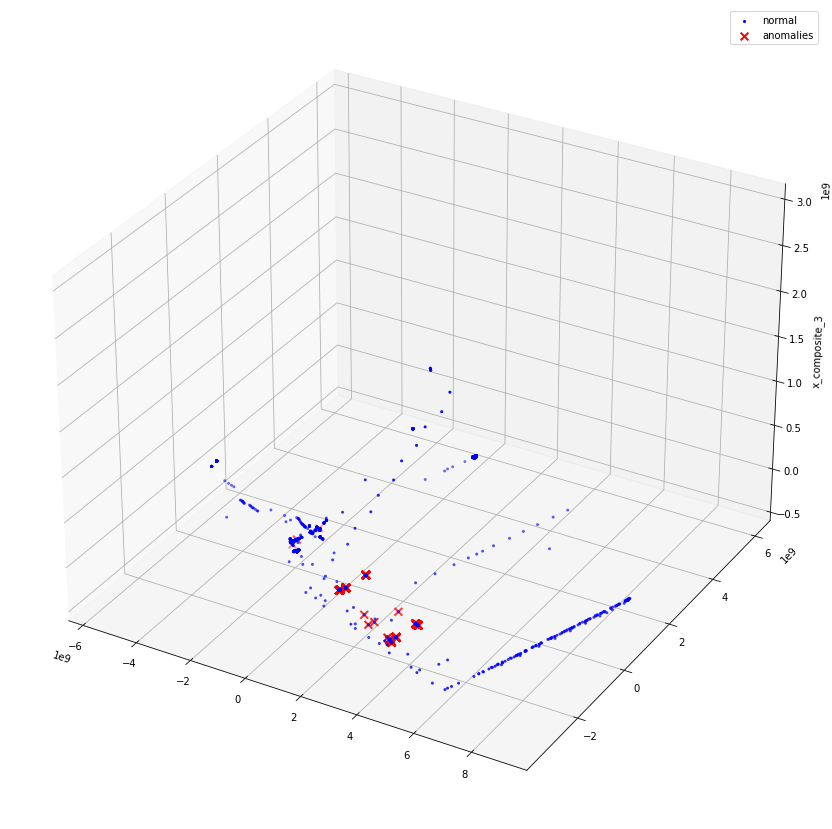

In [7]:
# Data preprocessing options (3d)
transformer = PCA(n_components=3)
transformer.fit(X)
X_transformed_3d = transformer.transform(X)
print(X_transformed_3d.shape)


# Plot 3D anomaly map
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_transformed_3d[:, 0], X_transformed_3d[:, 1], zs=X_transformed_3d[:, 2], s=4, lw=1, label="normal",c="blue")
# Plot x's for the ground truth outliers
ax.scatter(X_transformed_3d[anomaly_index_rf,0],X_transformed_3d[anomaly_index_rf,1], X_transformed_3d[anomaly_index_rf,2],
           lw=2, s=60, marker="x", c="red", label="anomalies")
ax.legend()
plt.show()

['node_filefd_allocated_10.211.55.101:9100'
 'node_filesystem_avail_bytes_10.211.55.101:9100'
 'node_filesystem_free_bytes_10.211.55.101:9100'
 'node_load1_10.211.55.101:9100' 'node_load15_10.211.55.101:9100'
 'node_load5_10.211.55.101:9100'
 'node_memory_Active_anon_bytes_10.211.55.101:9100'
 'node_memory_Active_bytes_10.211.55.101:9100'
 'node_memory_Active_file_bytes_10.211.55.101:9100'
 'node_memory_AnonHugePages_bytes_10.211.55.101:9100'
 'node_memory_AnonPages_bytes_10.211.55.101:9100'
 'node_memory_Buffers_bytes_10.211.55.101:9100'
 'node_memory_Cached_bytes_10.211.55.101:9100'
 'node_memory_Committed_AS_bytes_10.211.55.101:9100'
 'node_memory_Dirty_bytes_10.211.55.101:9100'
 'node_memory_Inactive_anon_bytes_10.211.55.101:9100'
 'node_memory_Inactive_bytes_10.211.55.101:9100'
 'node_memory_Inactive_file_bytes_10.211.55.101:9100'
 'node_memory_KernelStack_bytes_10.211.55.101:9100'
 'node_memory_Mapped_bytes_10.211.55.101:9100'
 'node_memory_MemAvailable_bytes_10.211.55.101:9100'


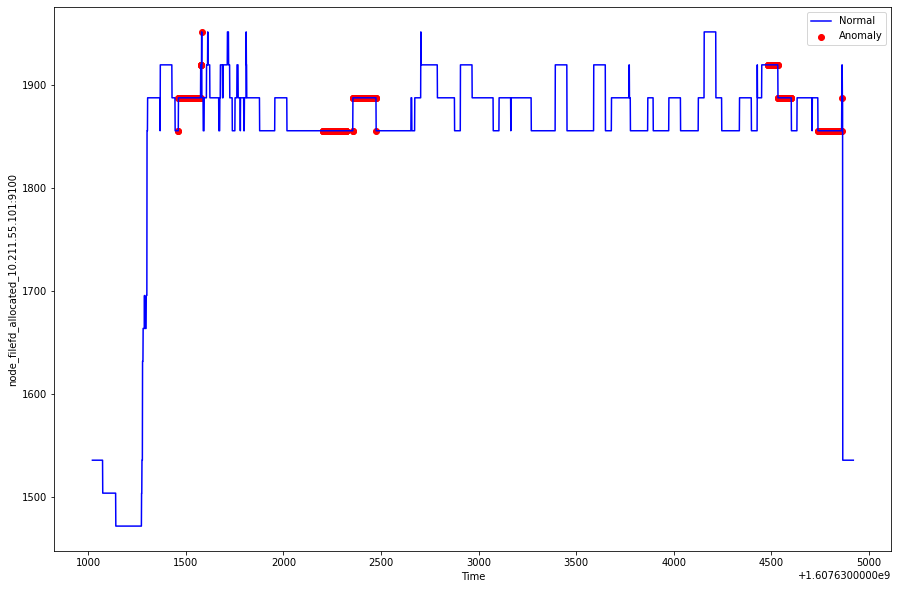

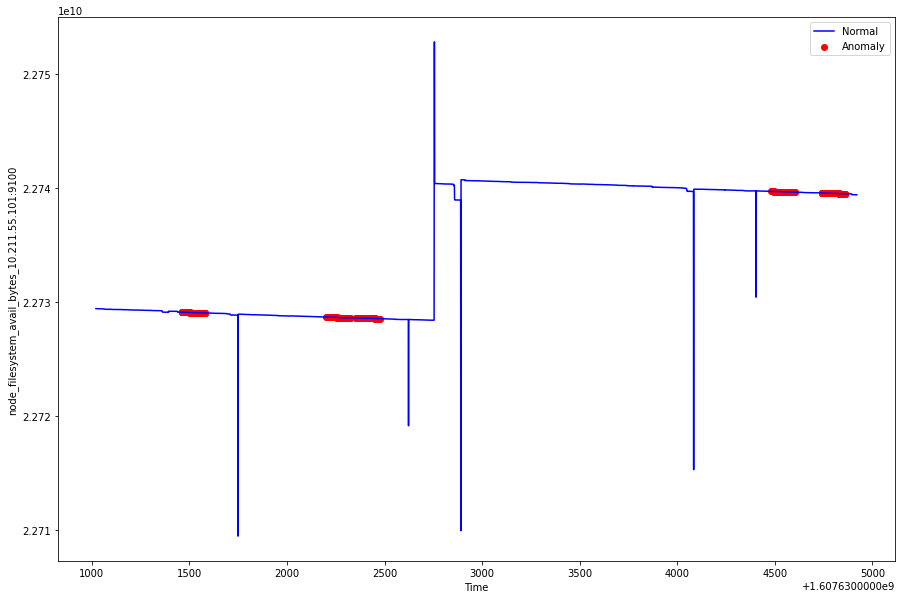

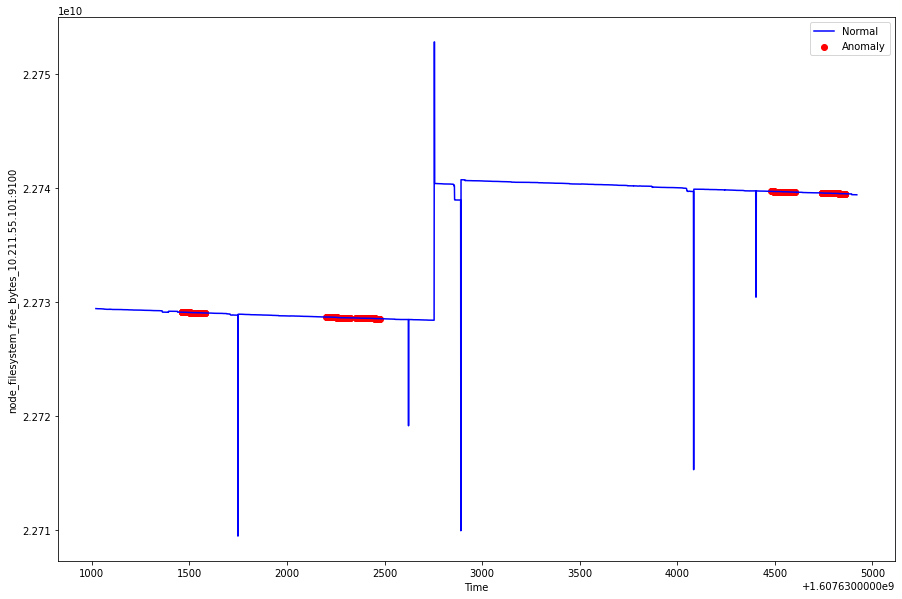

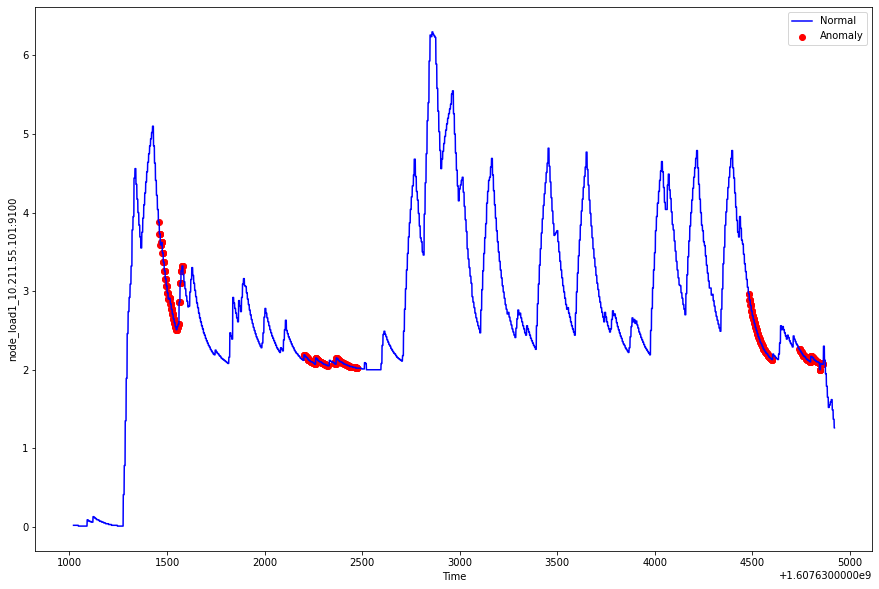

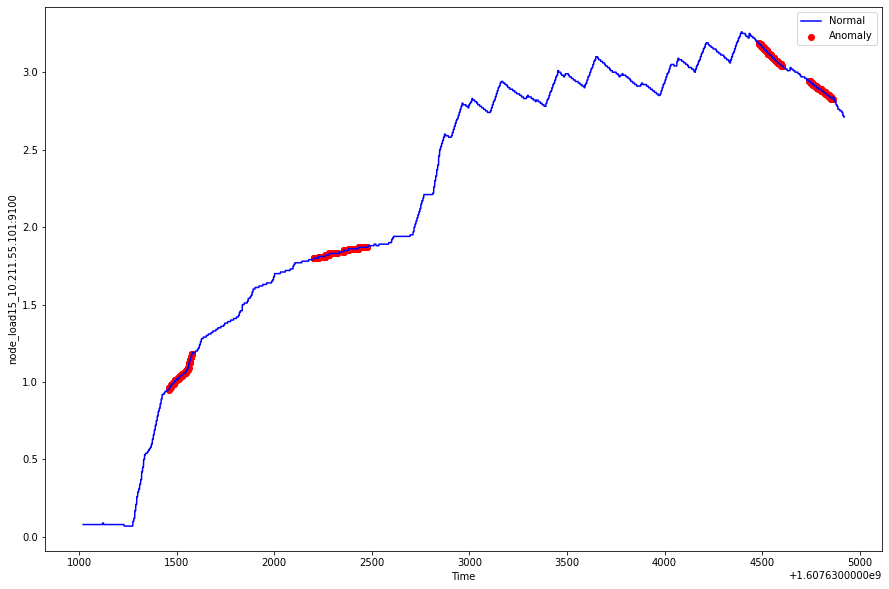

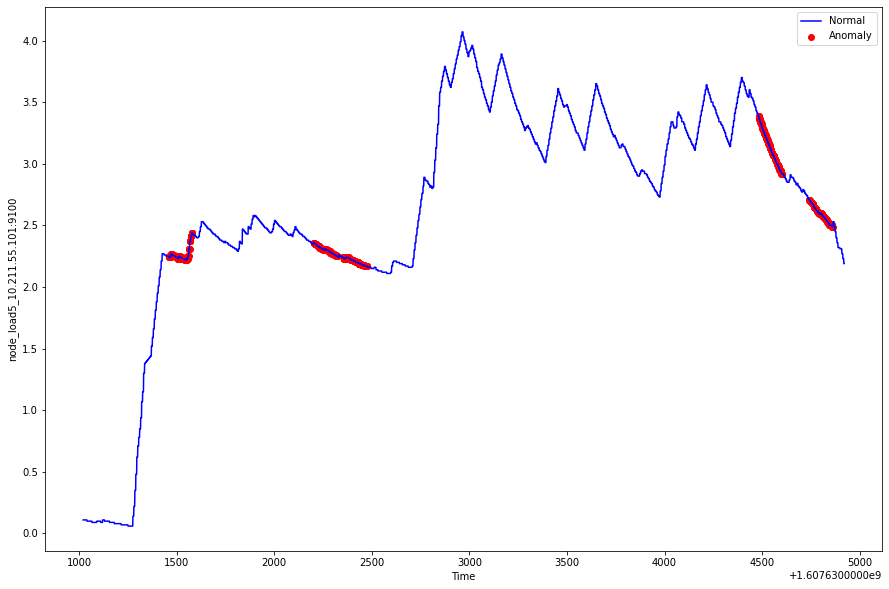

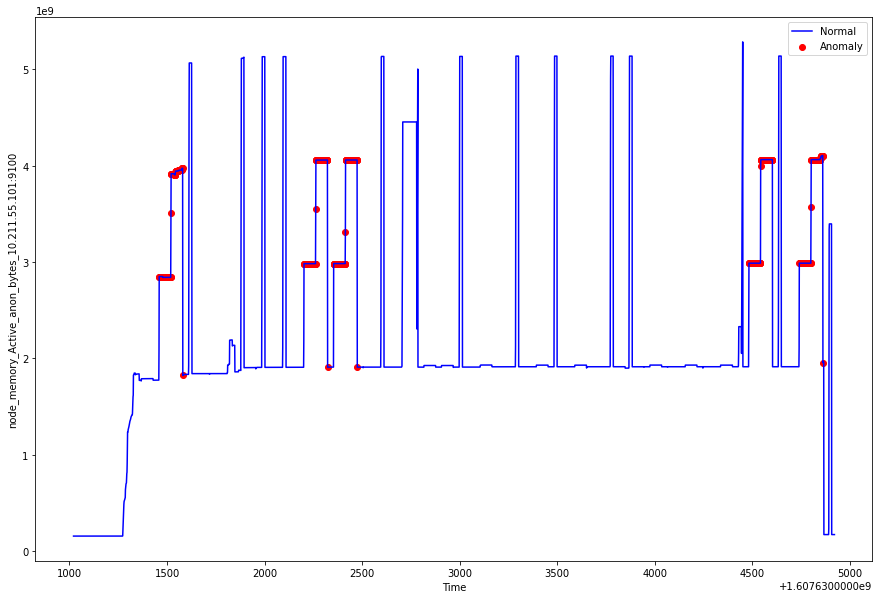

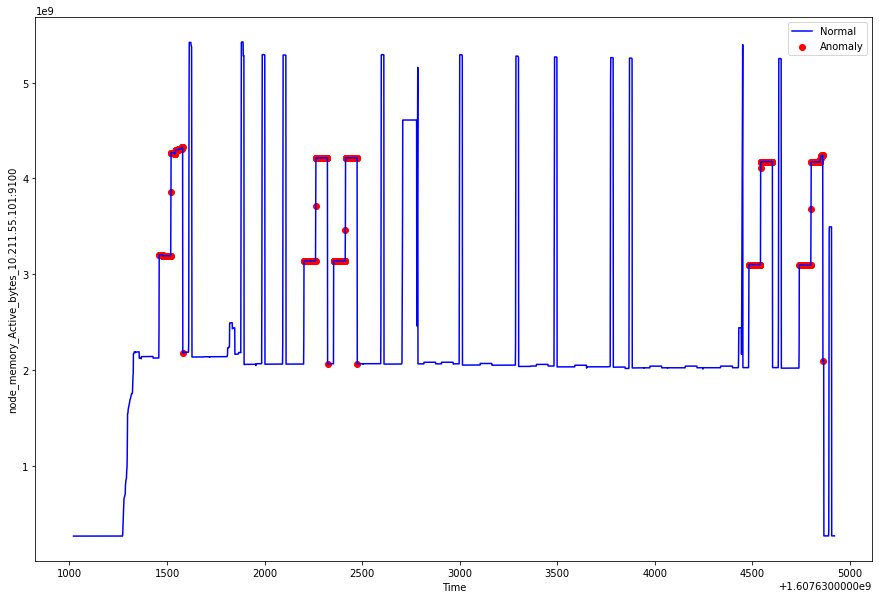

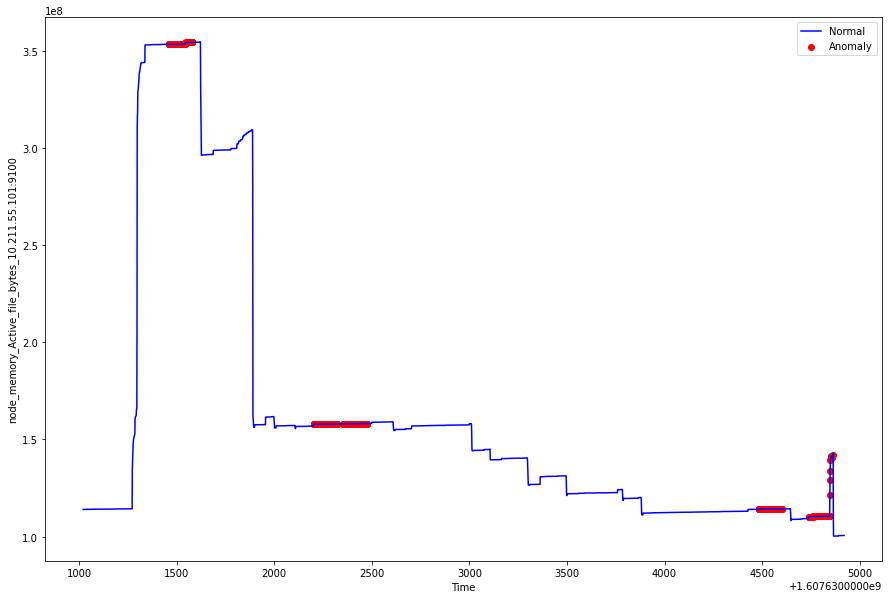

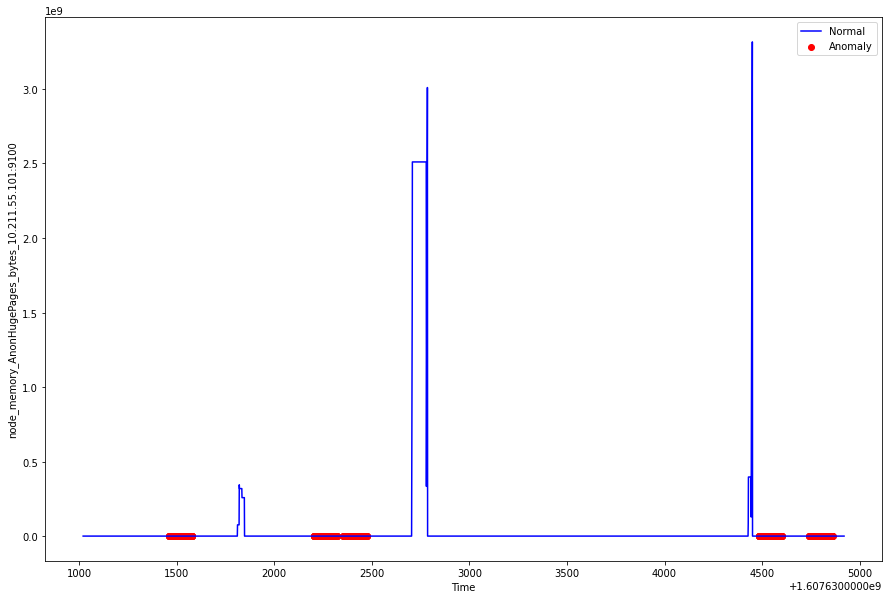

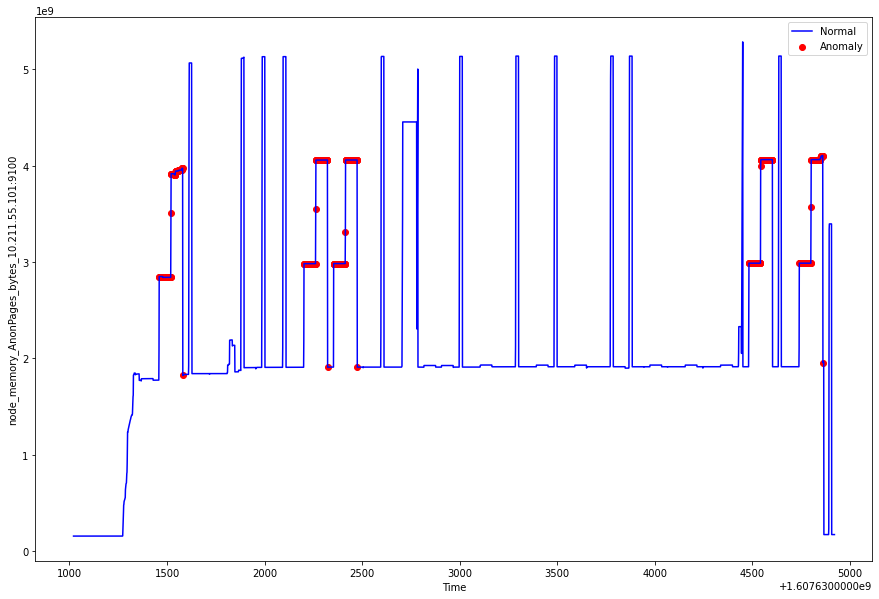

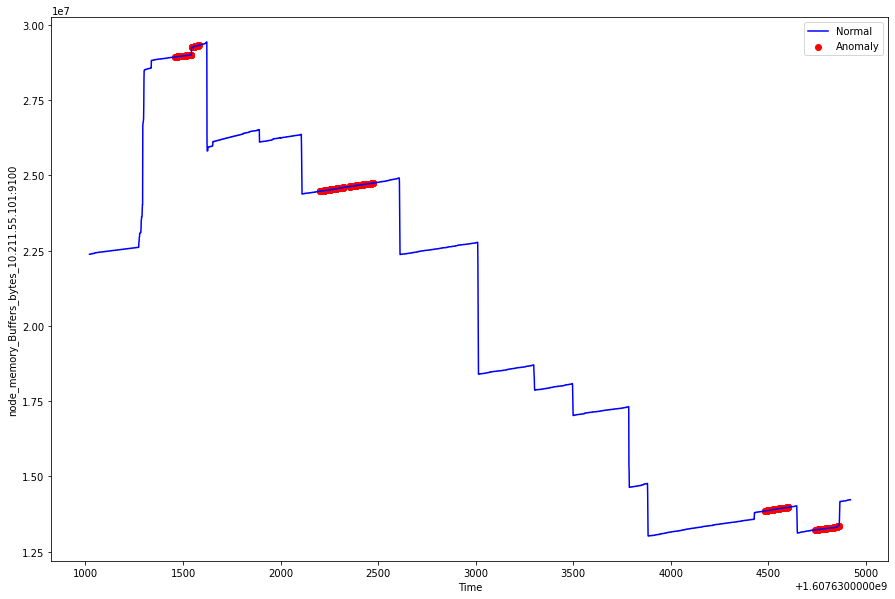

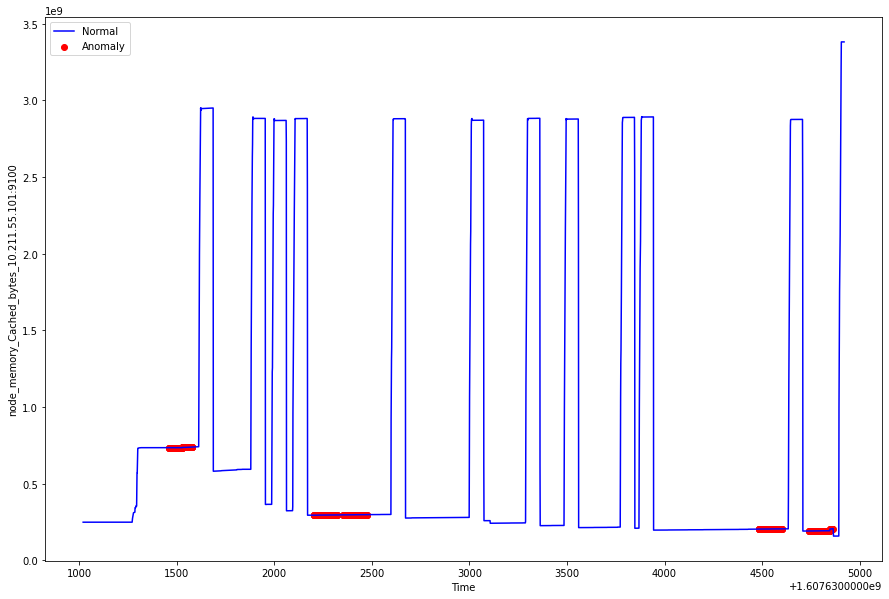

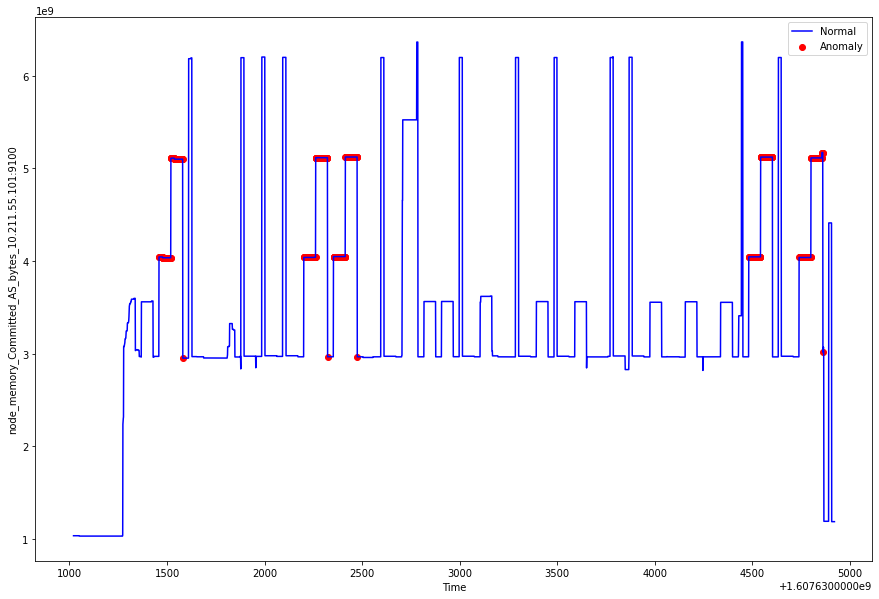

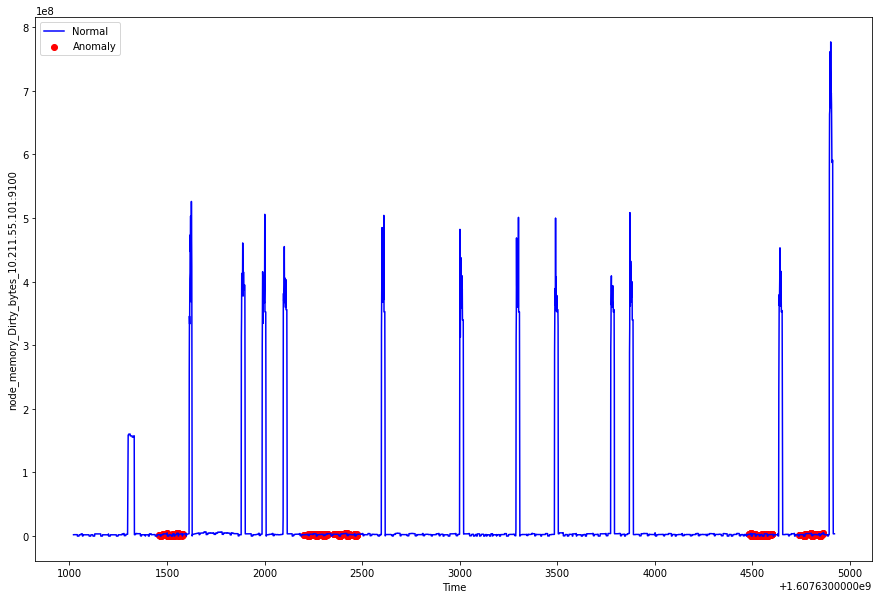

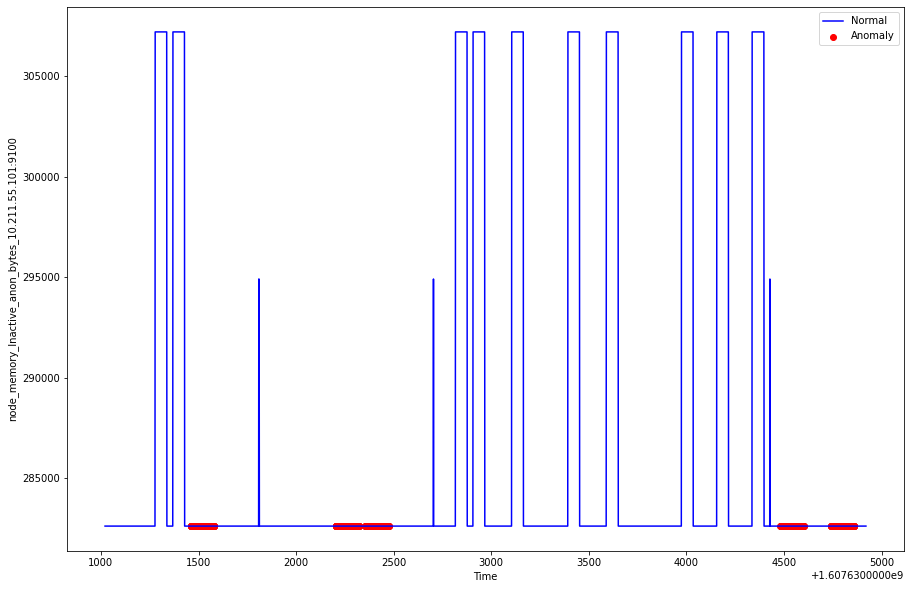

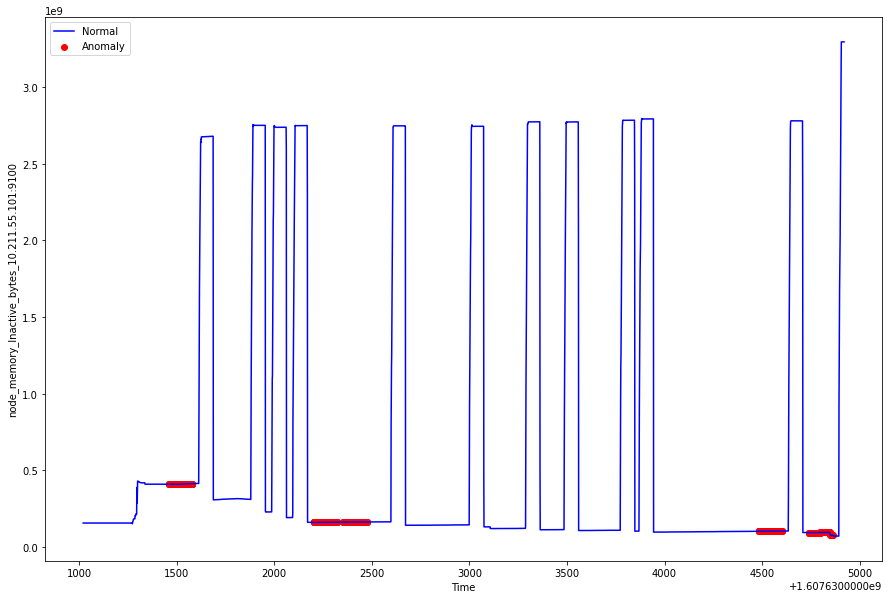

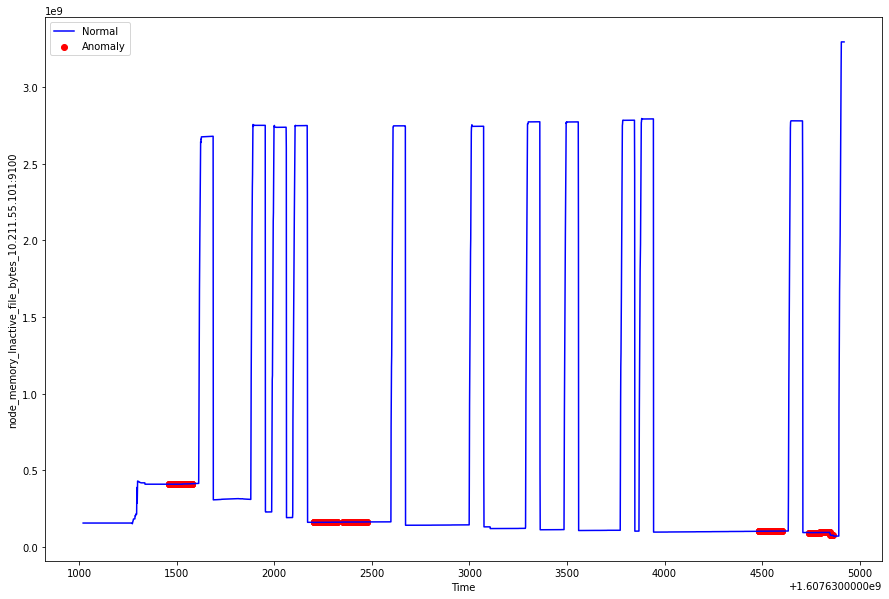

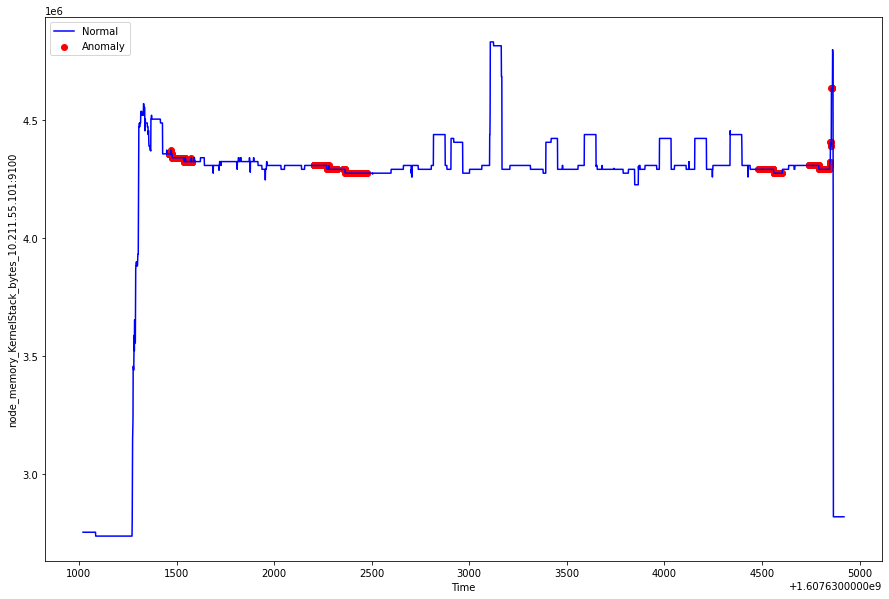

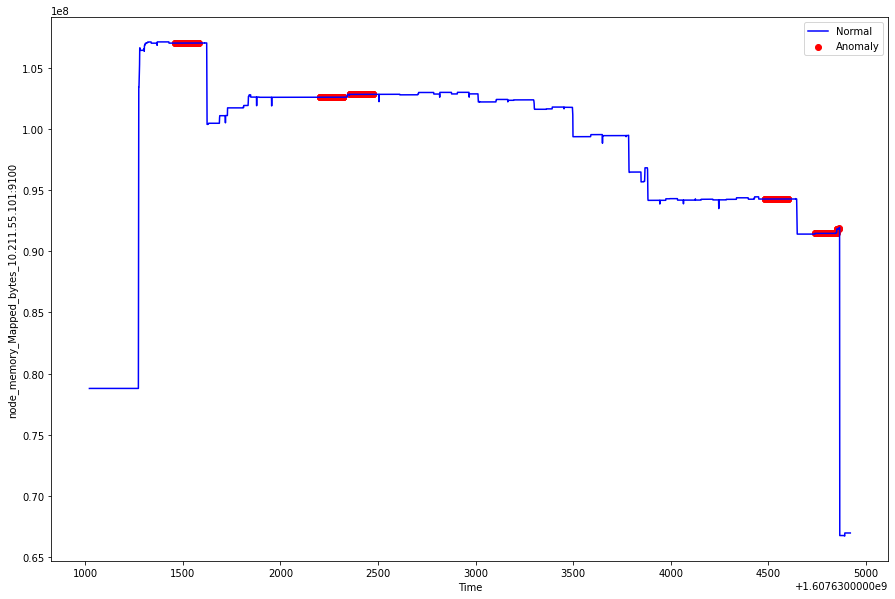

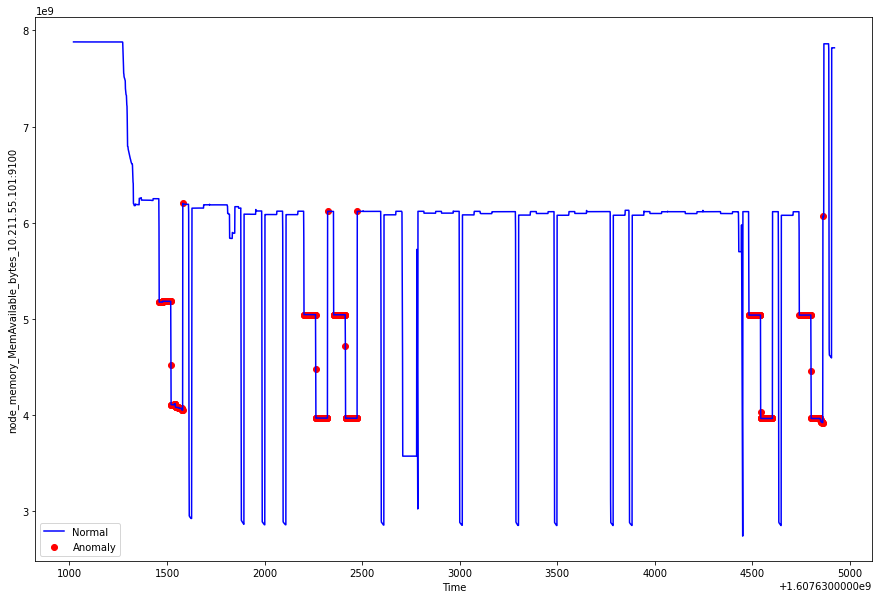

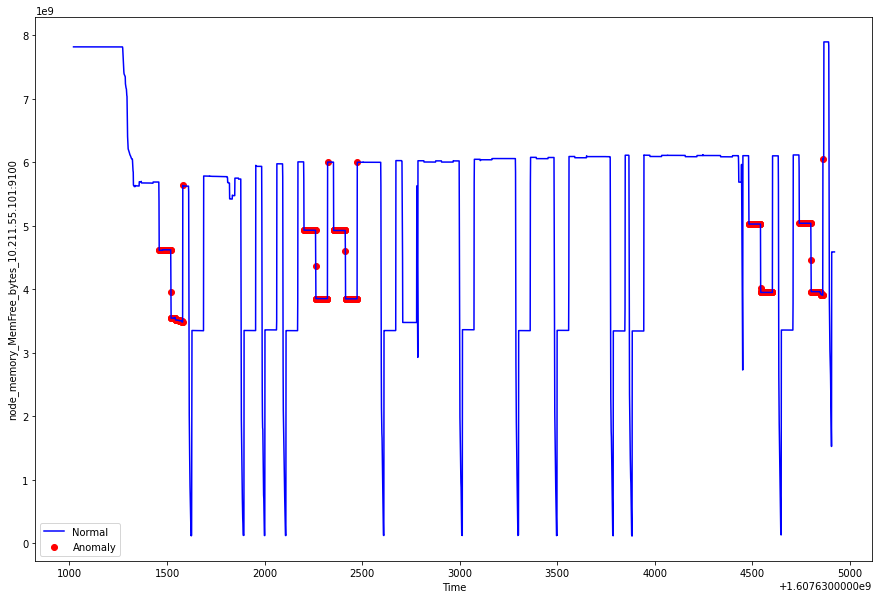

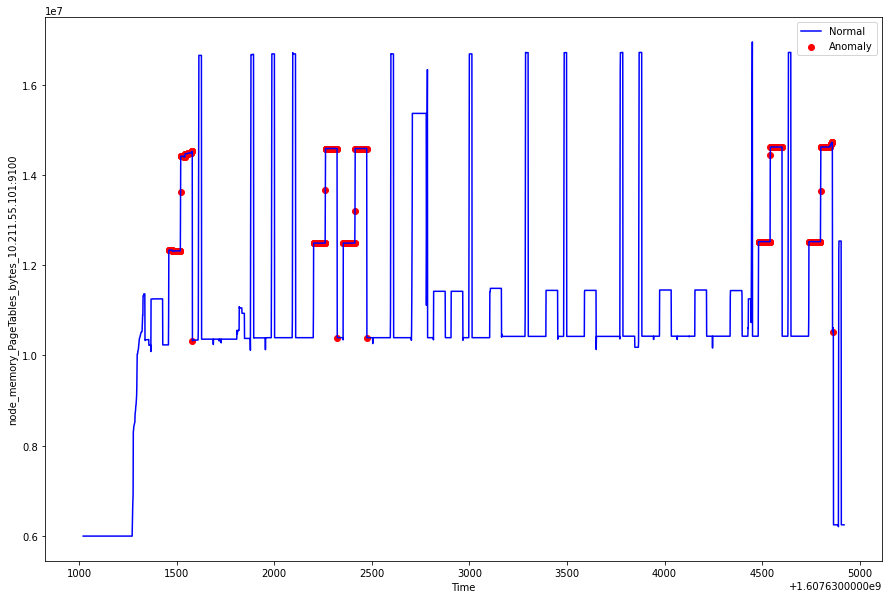

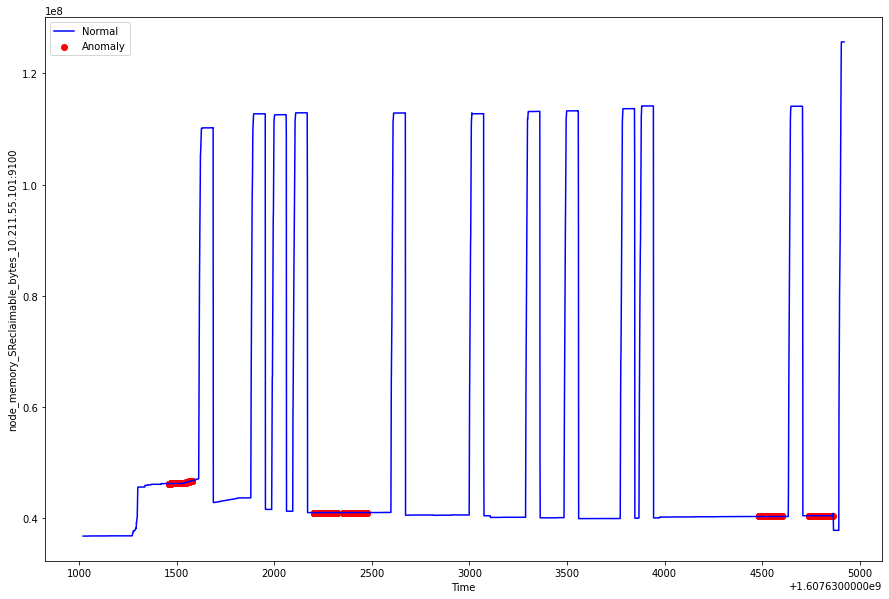

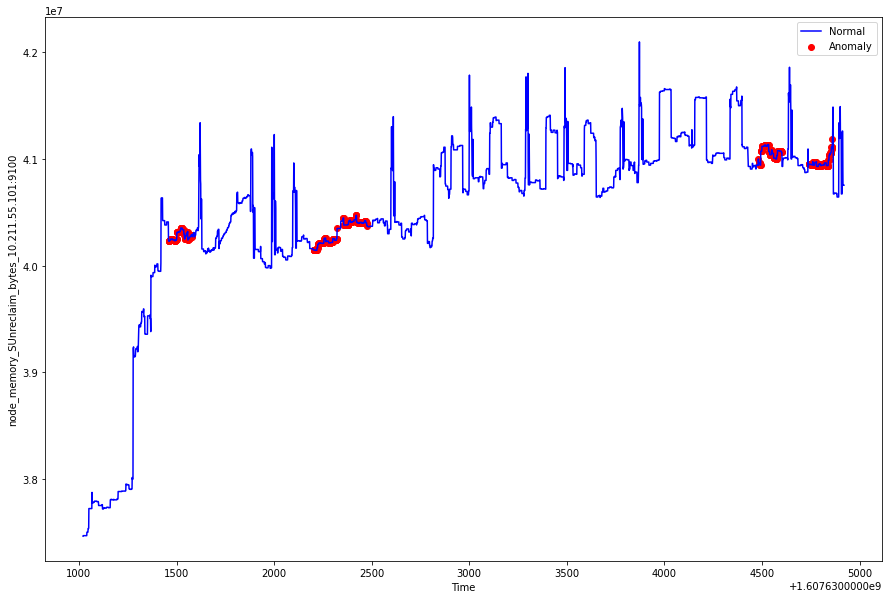

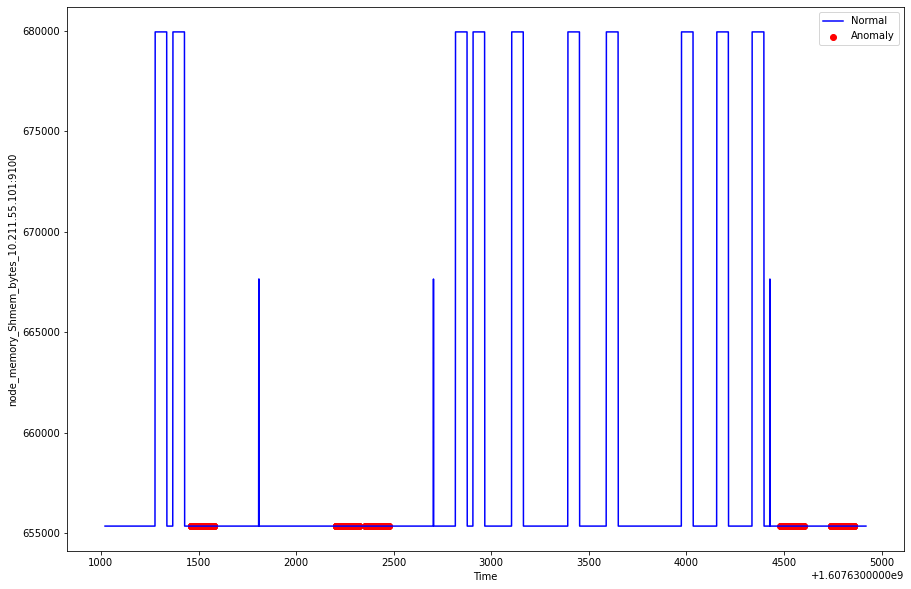

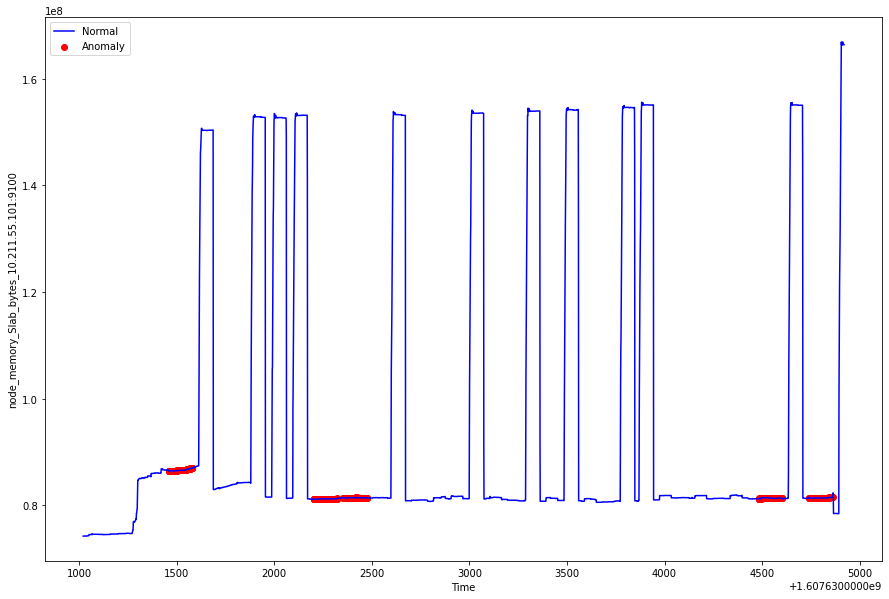

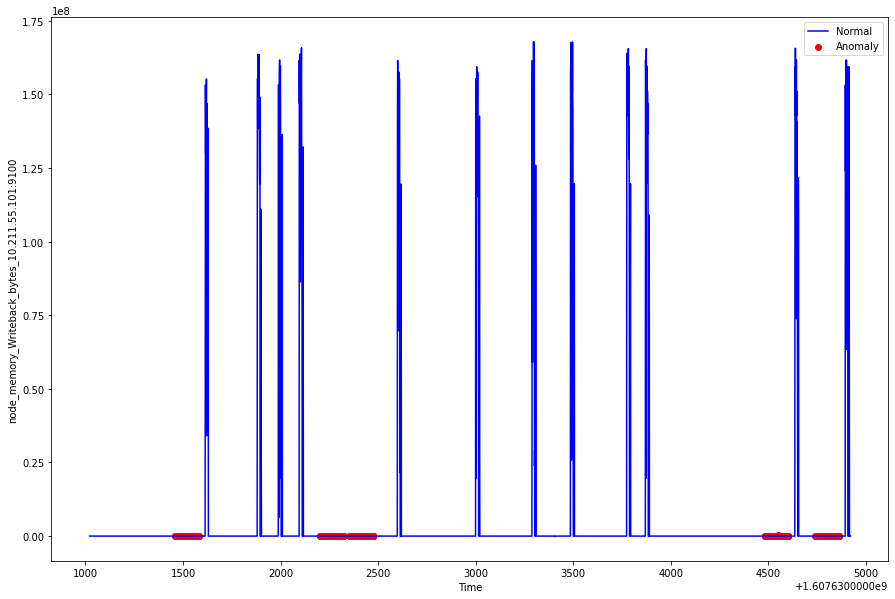

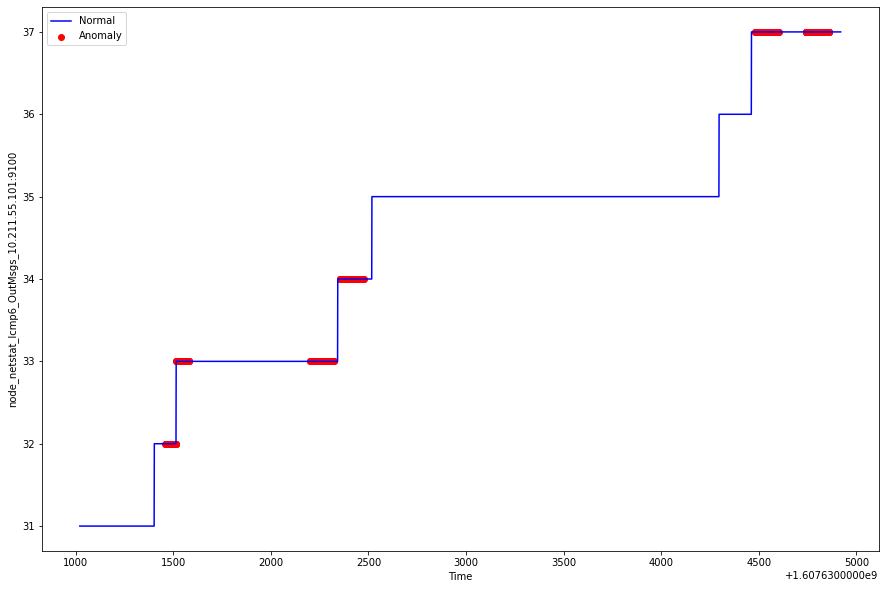

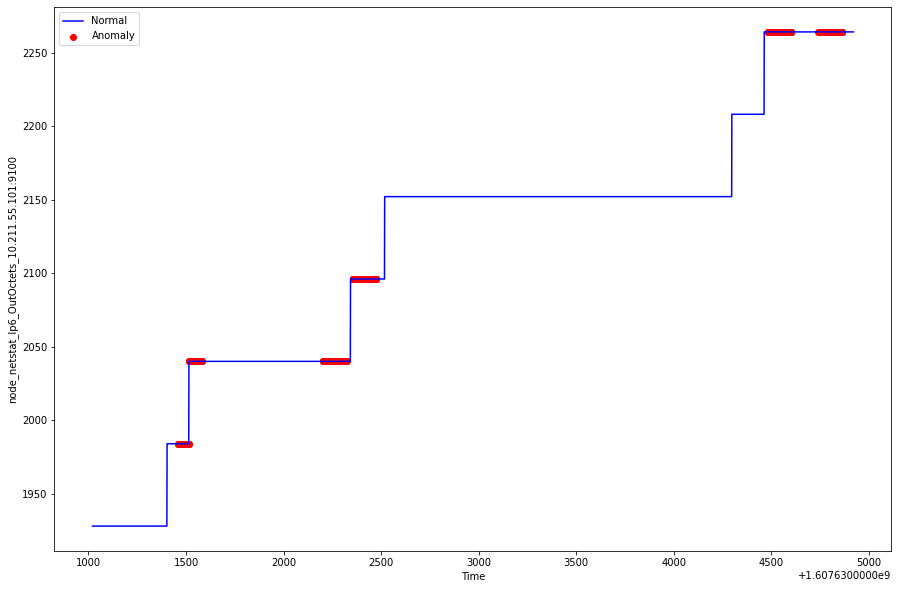

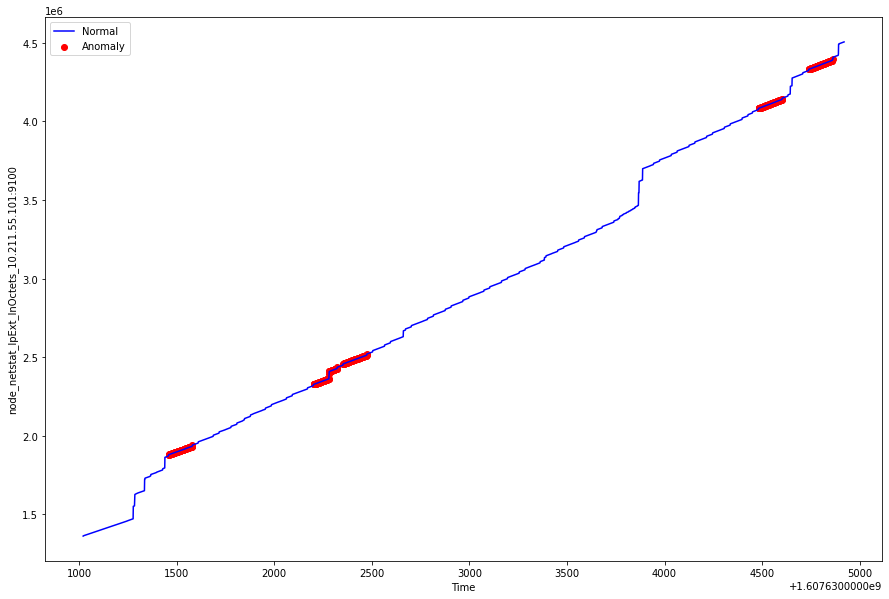

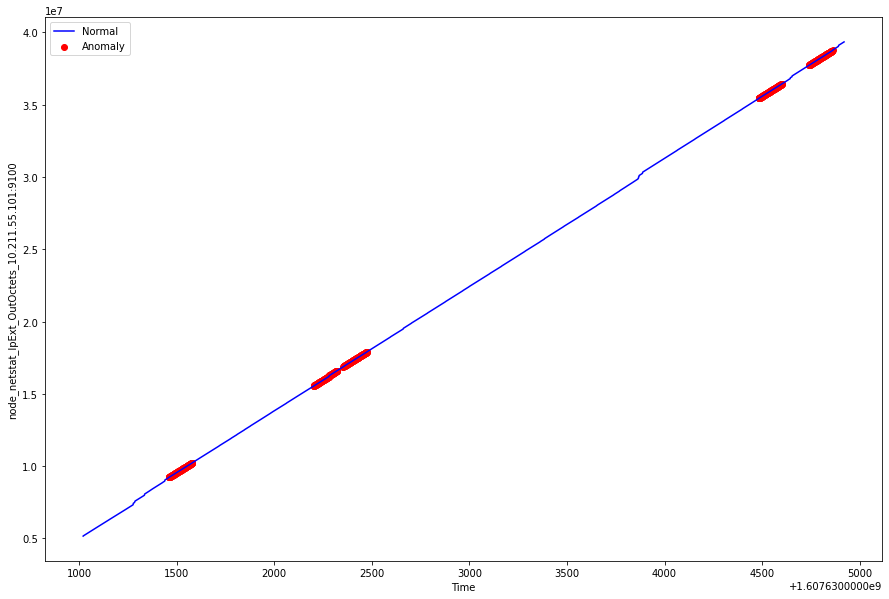

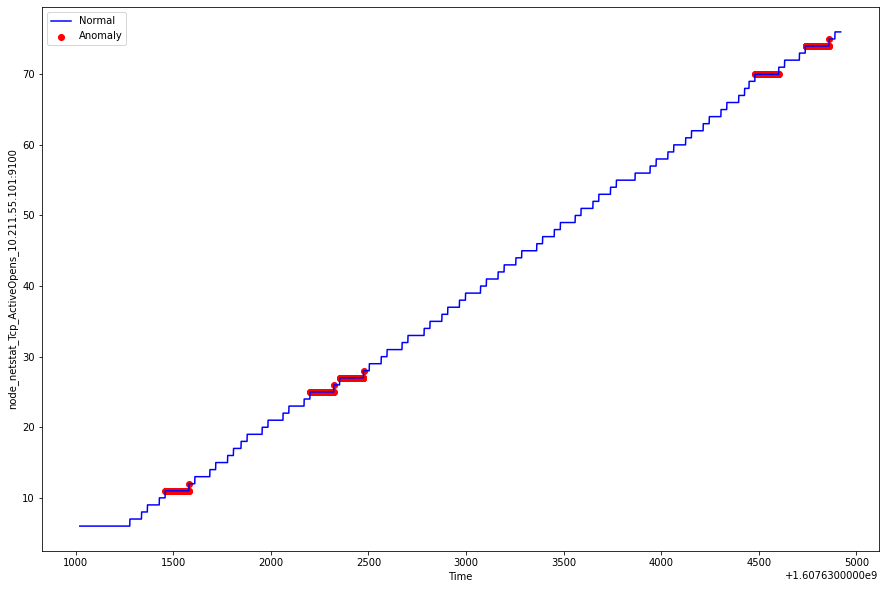

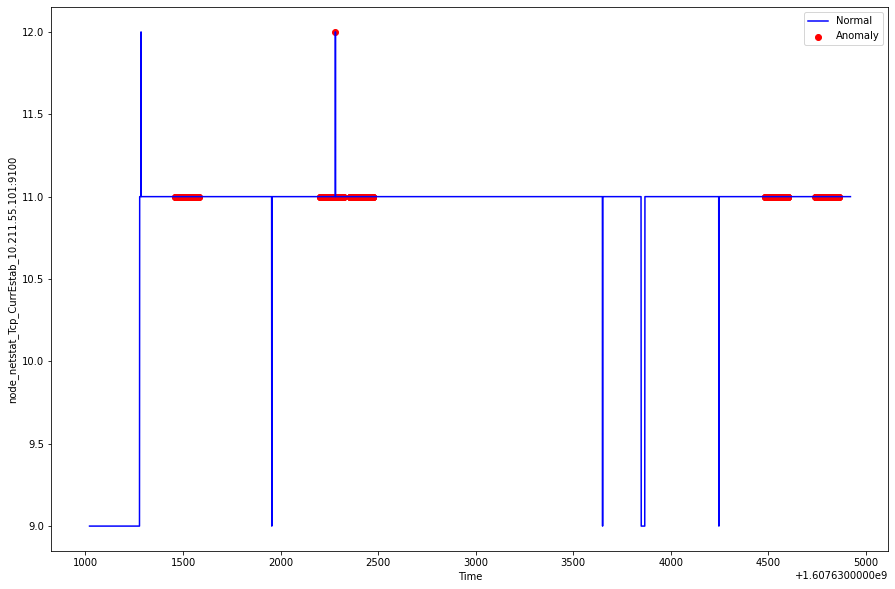

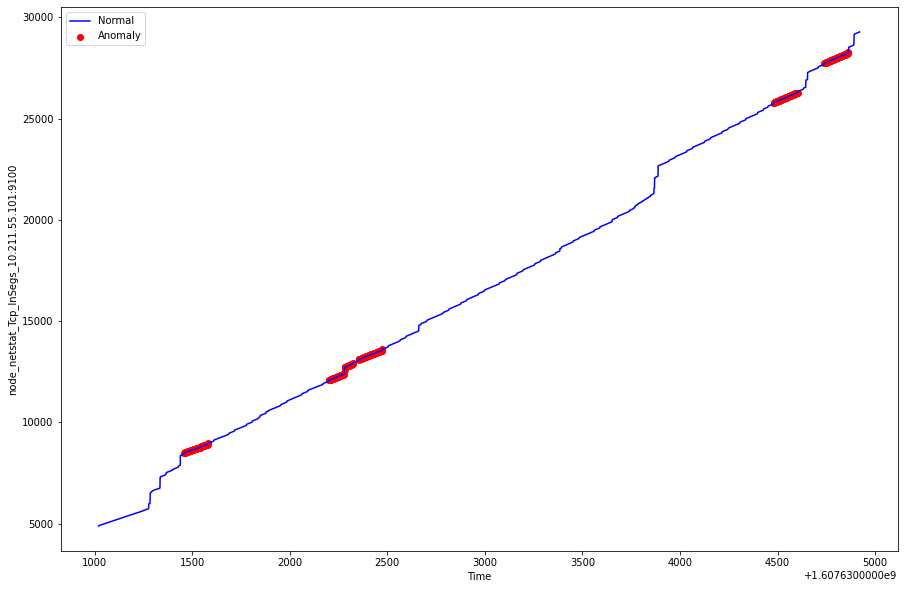

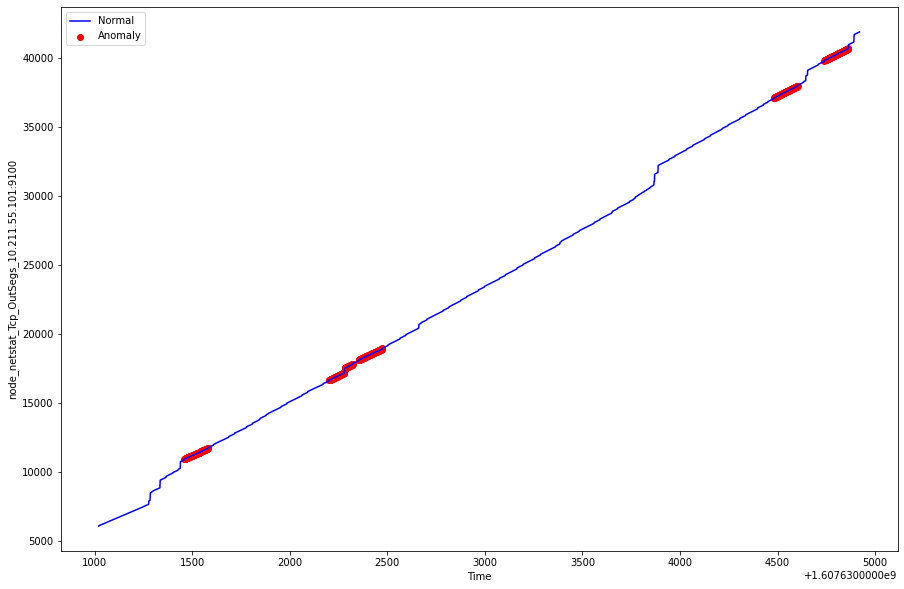

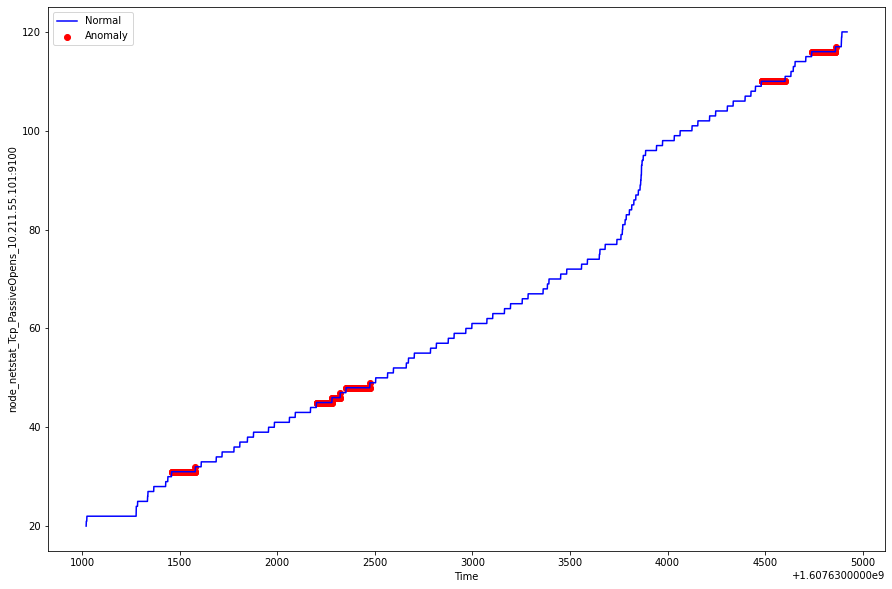

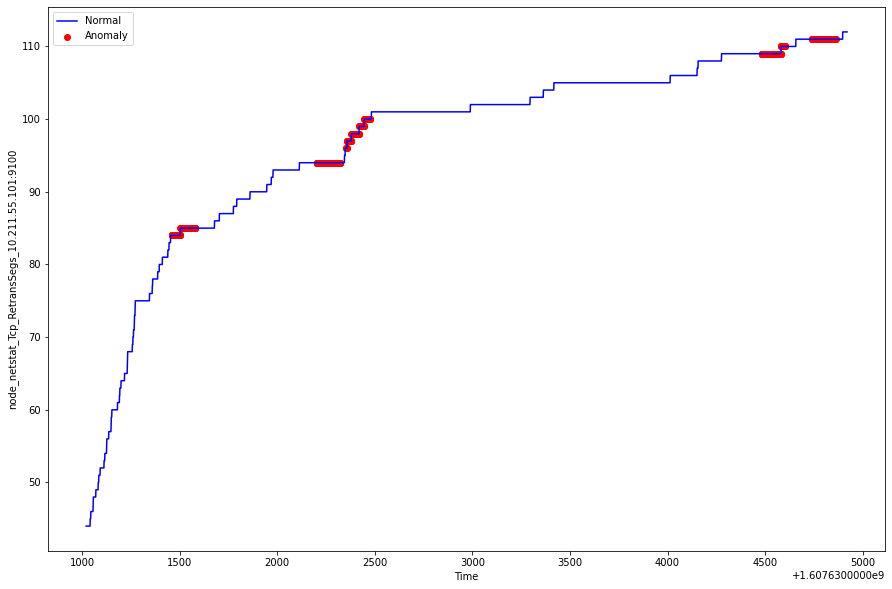

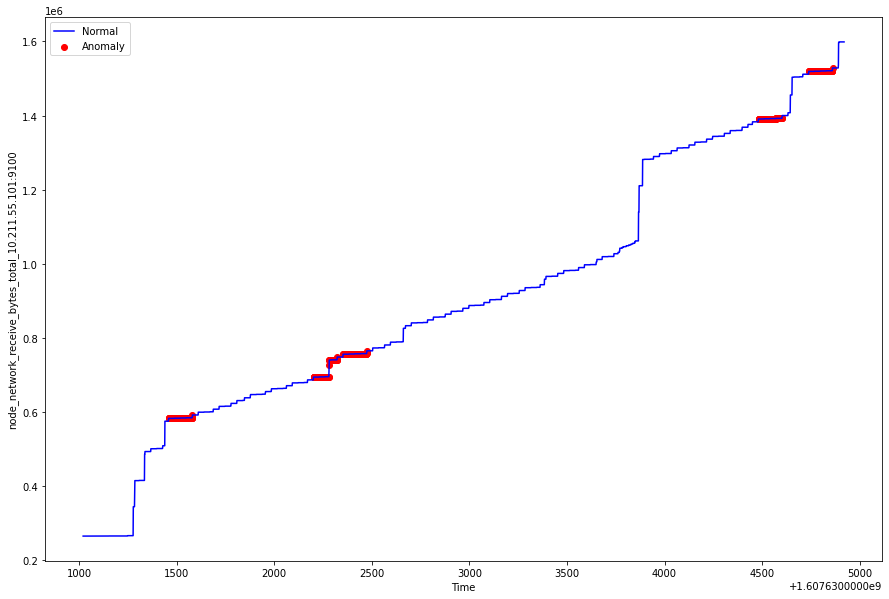

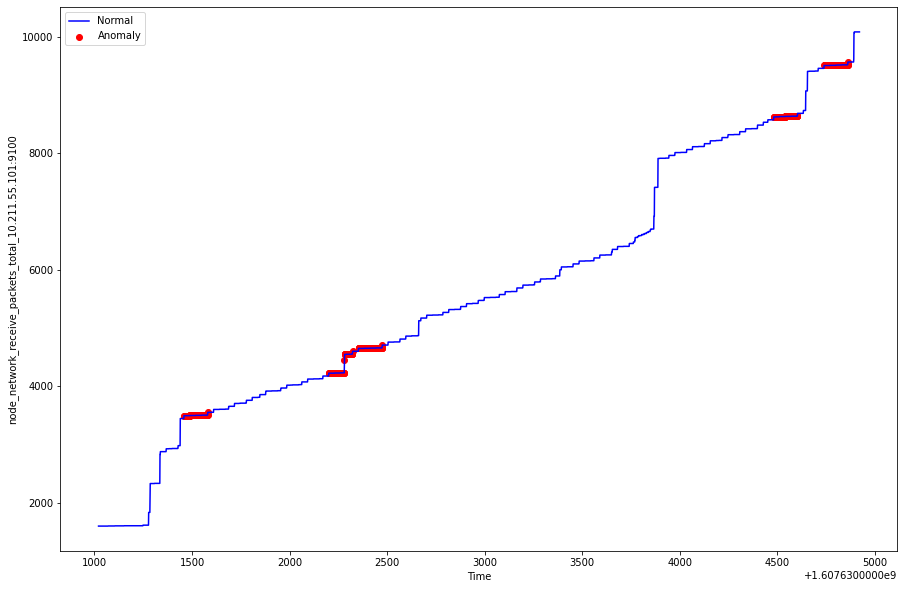

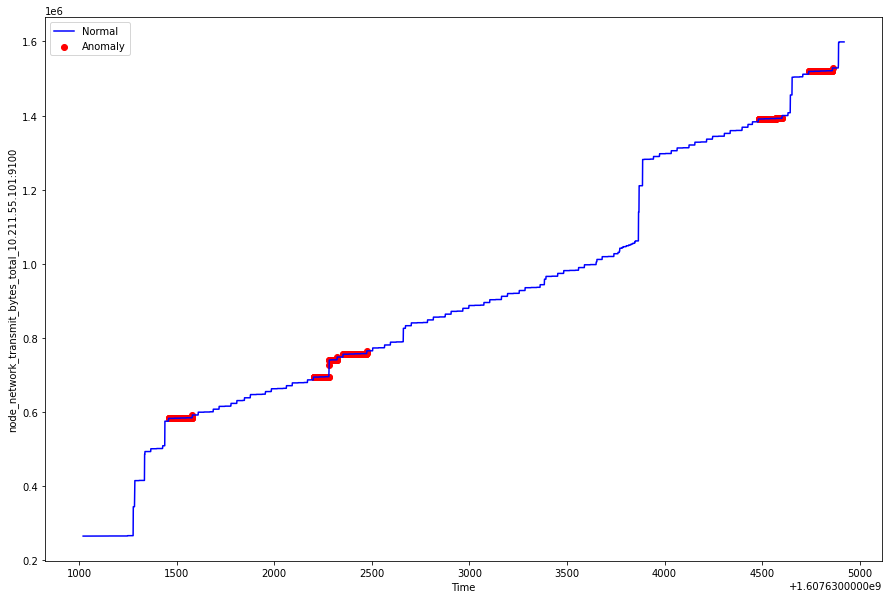

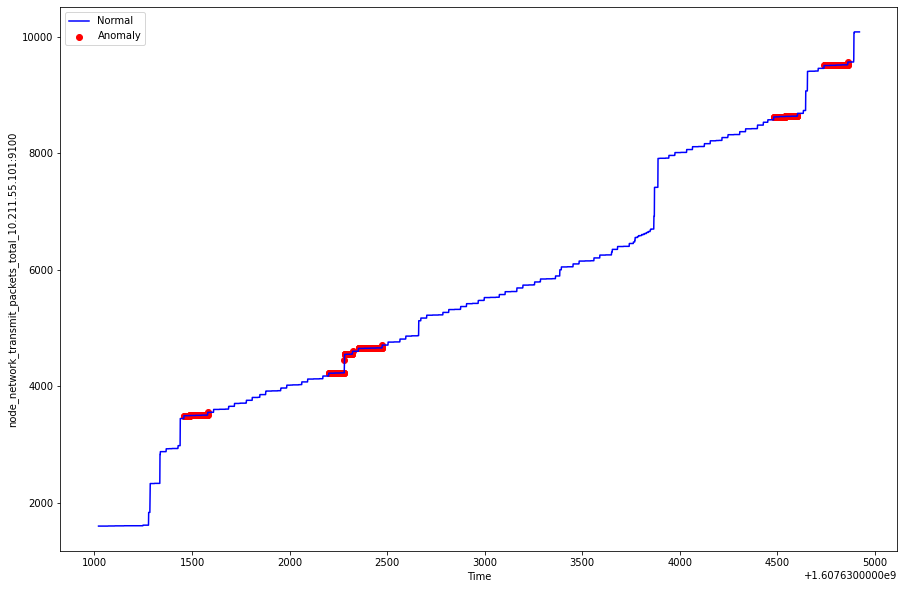

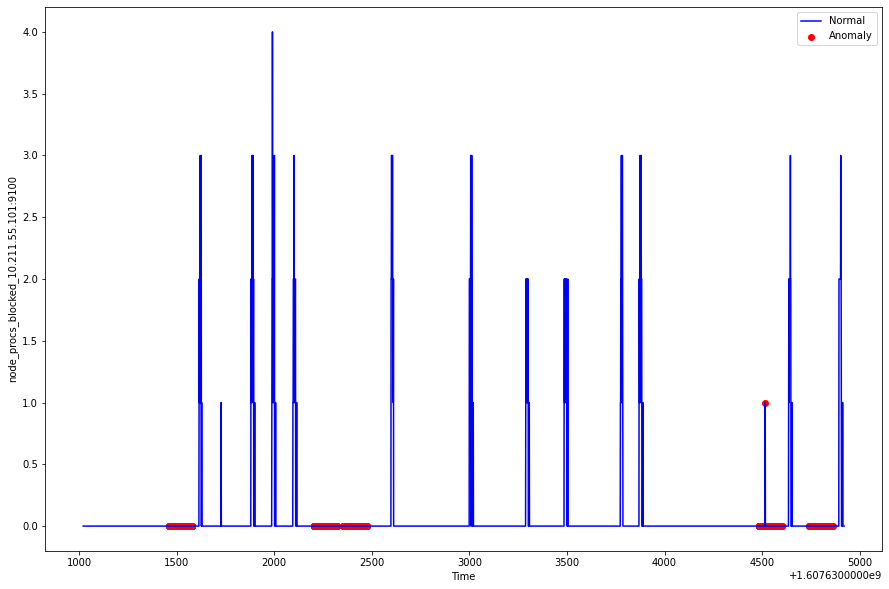

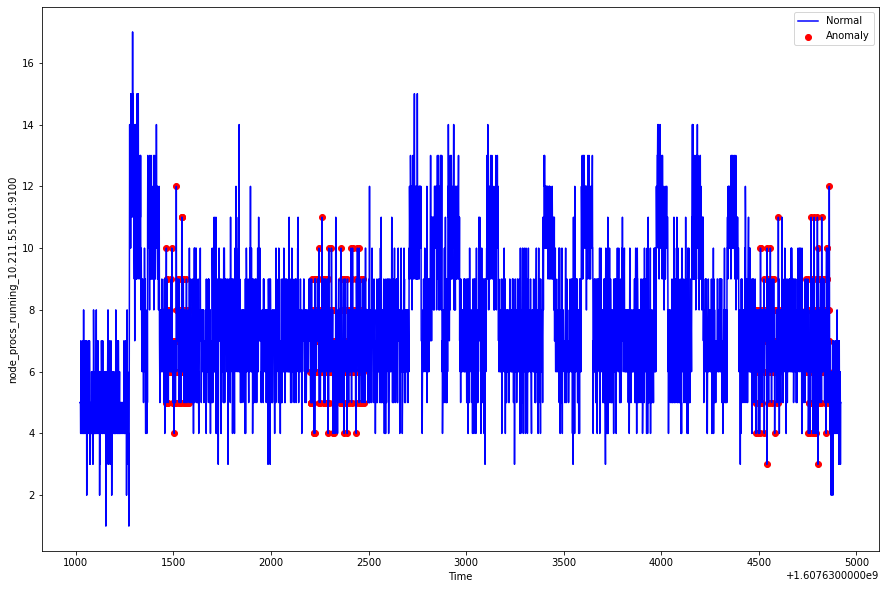

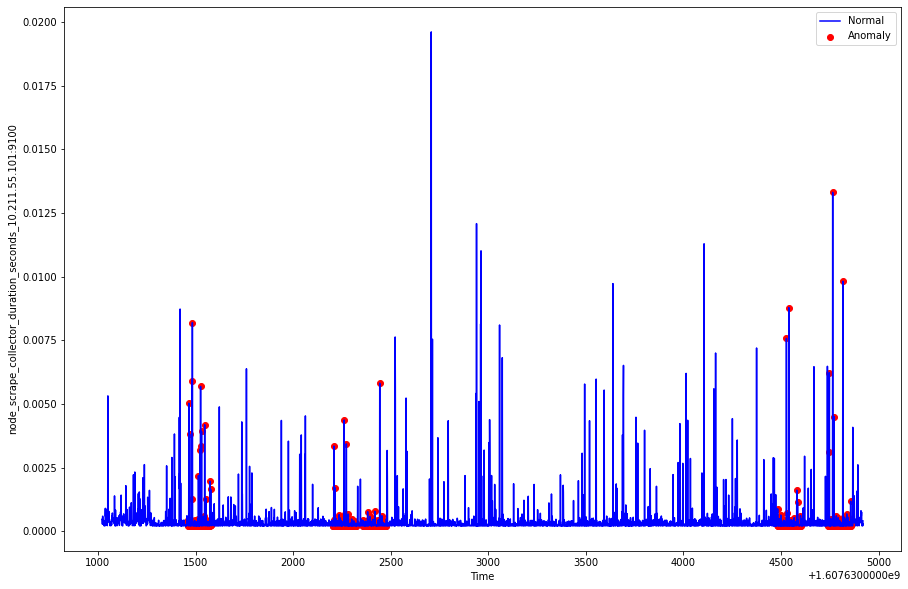

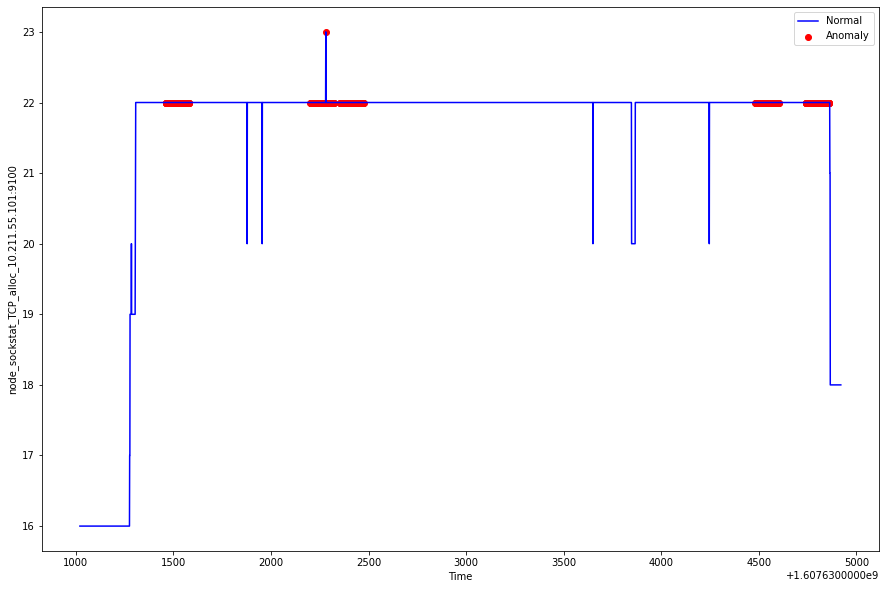

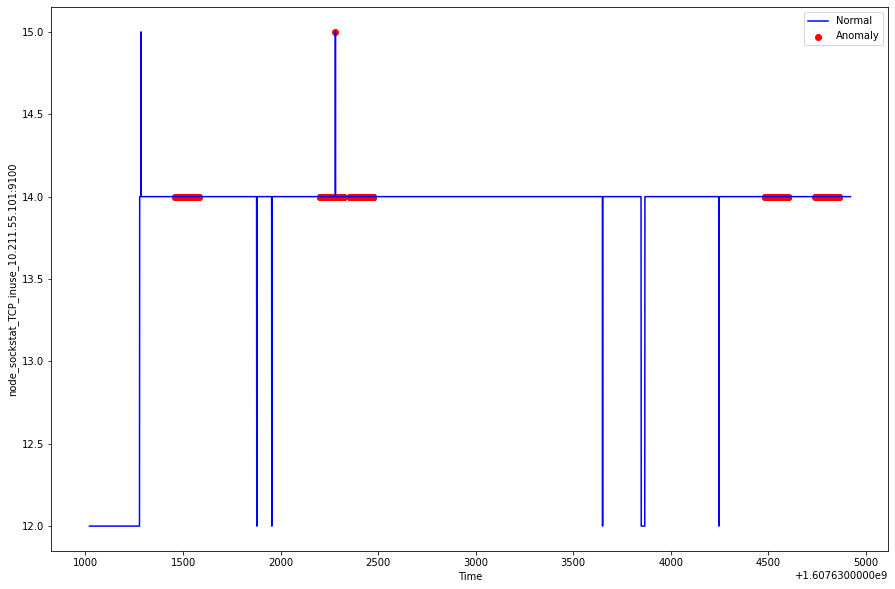

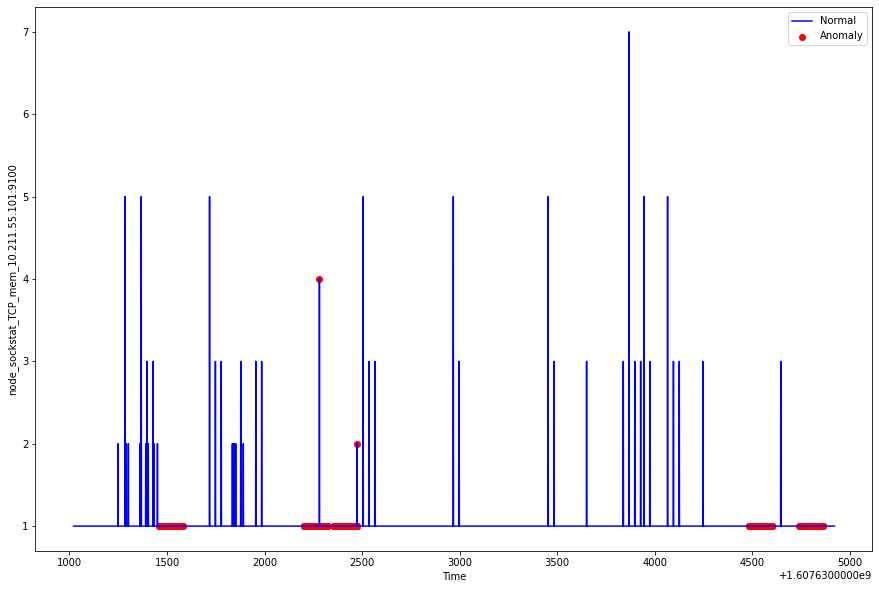

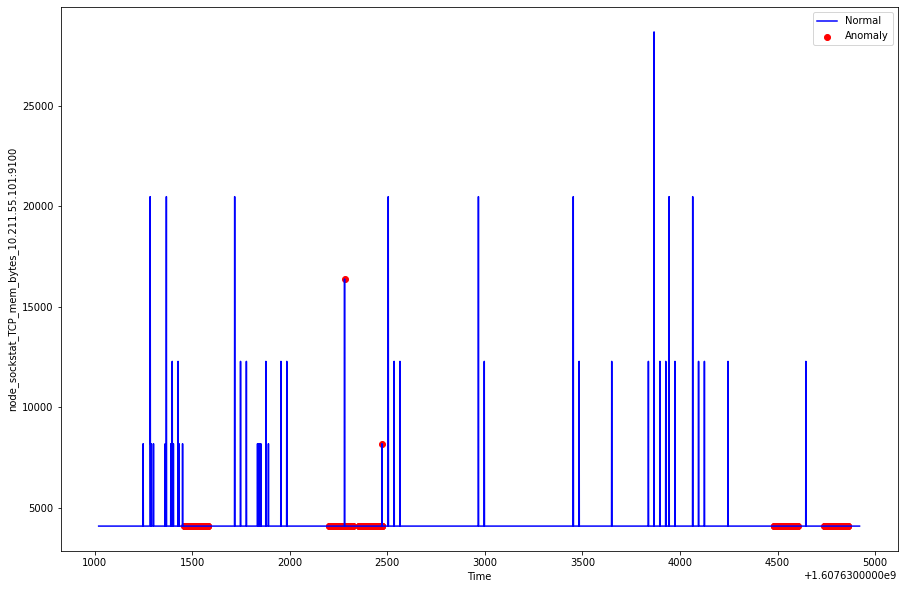

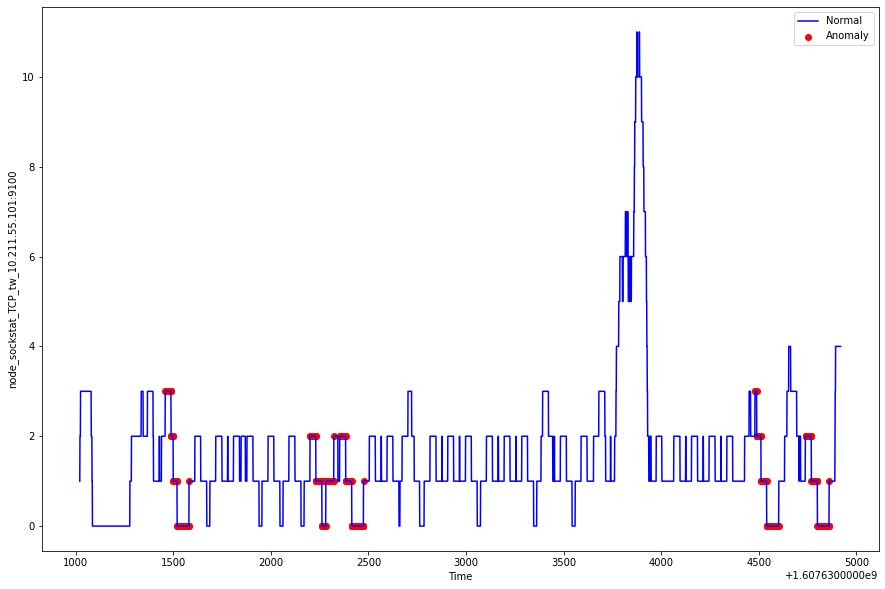

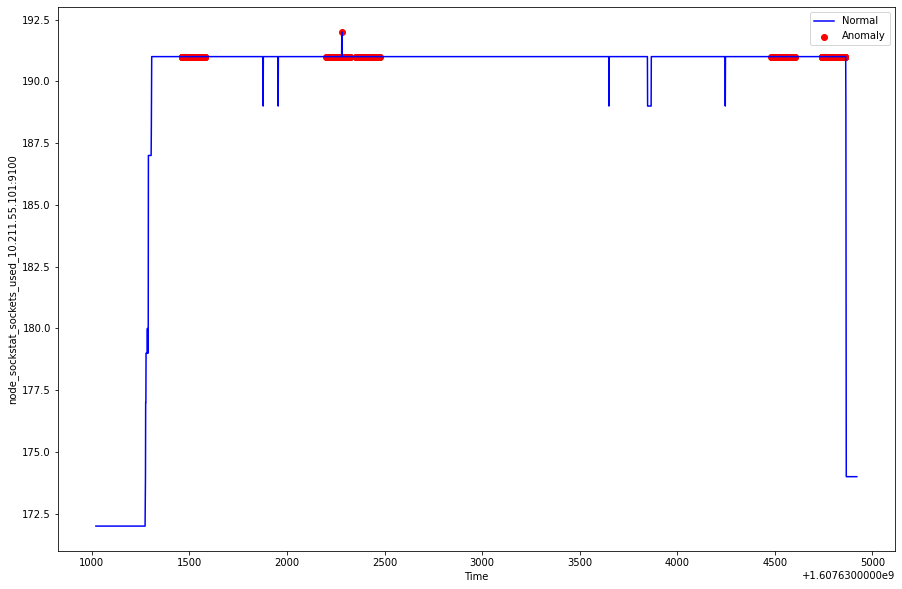

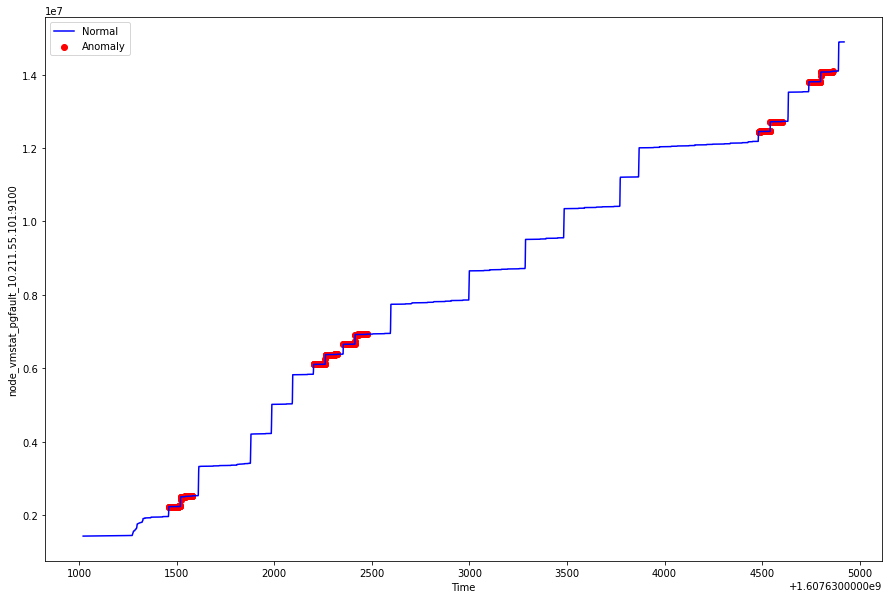

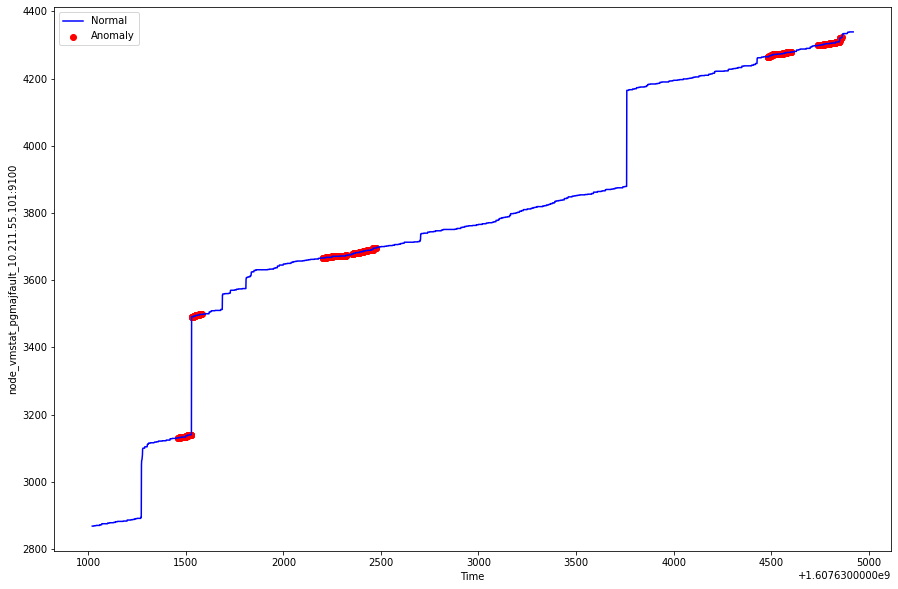

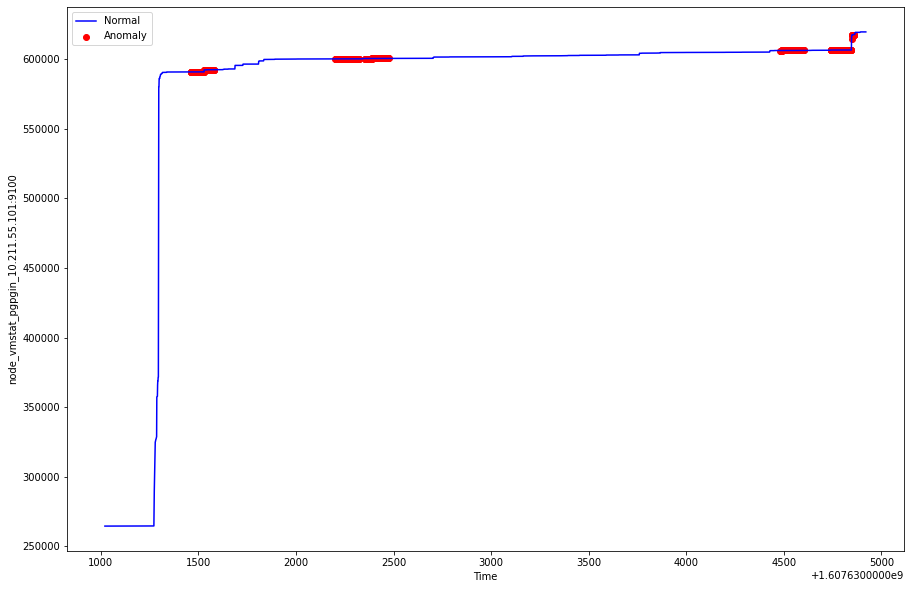

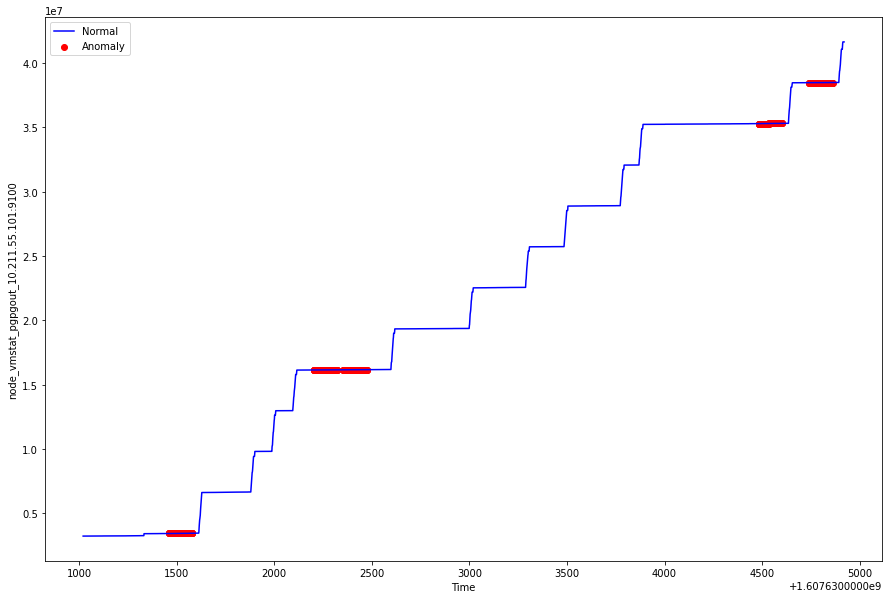

In [8]:
# Add anomalies to all columns from raw dataframe

df_plot = X
print(df_plot.columns.values)
col_names_plt = list(df_plot.columns.values)
df_plot['anomaly'] = y
# df_plot['time'] = time
for feature in col_names_plt:
    if feature == 'time' or feature == 'anomaly':
        pass
    else:
        fig, ax = plt.subplots(figsize=(15,10))
        a = df_plot.loc[df_plot['anomaly'] == 1, ['time', feature]] #anomaly
        ax.plot(df_plot['time'], df_plot[feature], color='blue', label='Normal')
        ax.scatter(a['time'],a[feature], color='red', label='Anomaly')
        plt.xlabel('Time')
        plt.ylabel(feature)
        plt.legend()
        plt.show();

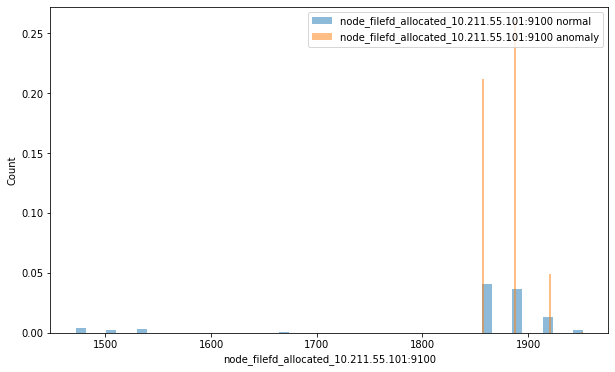

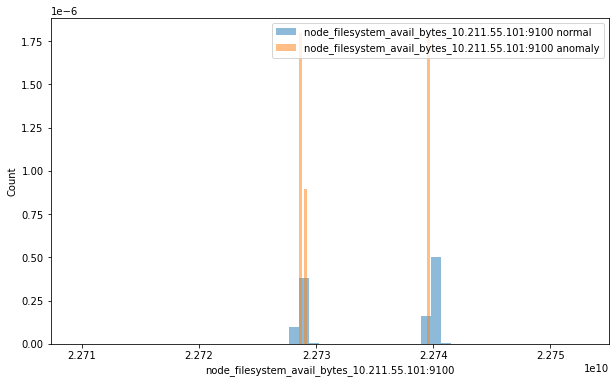

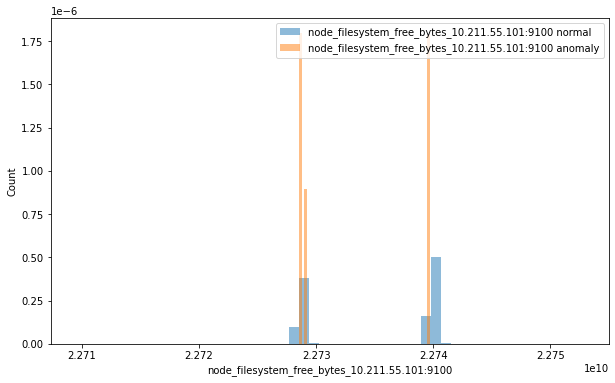

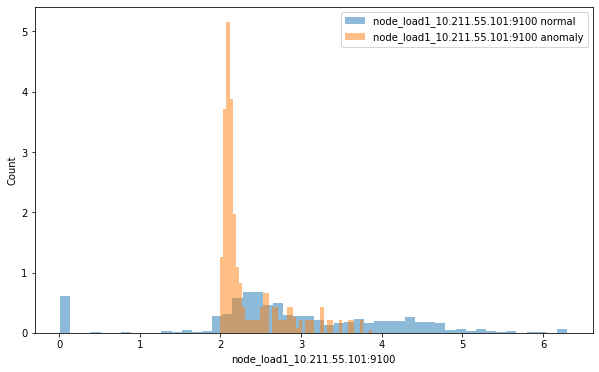

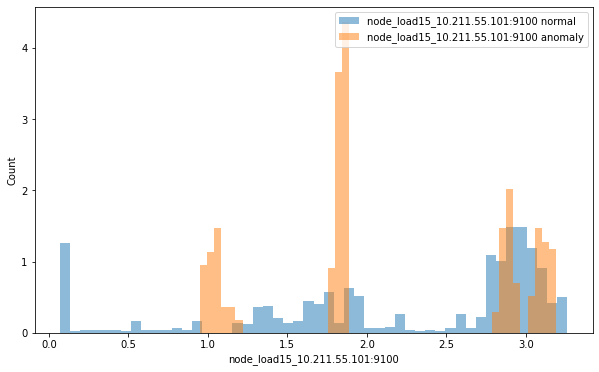

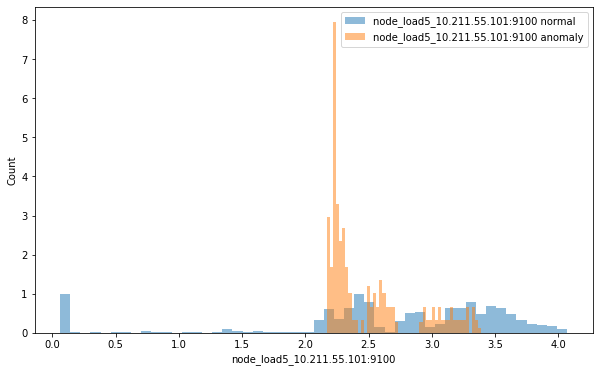

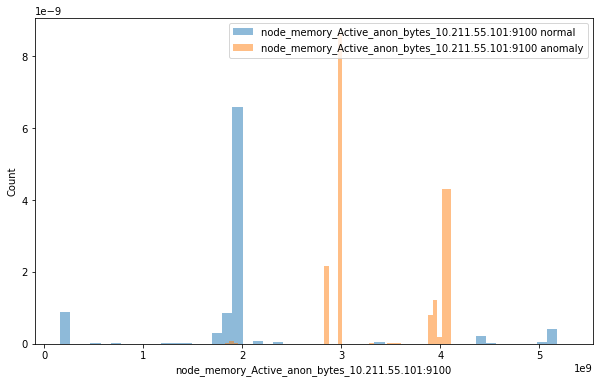

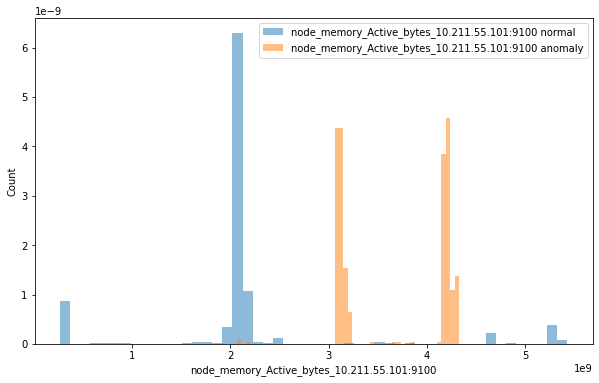

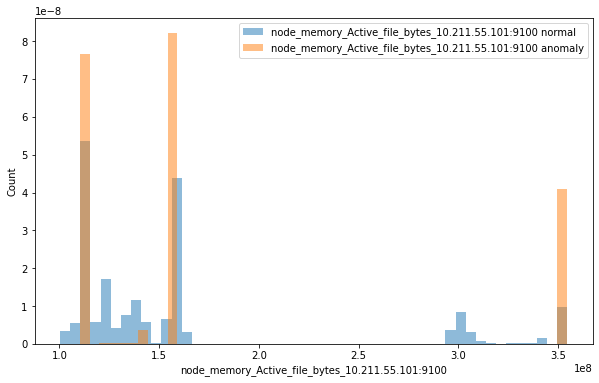

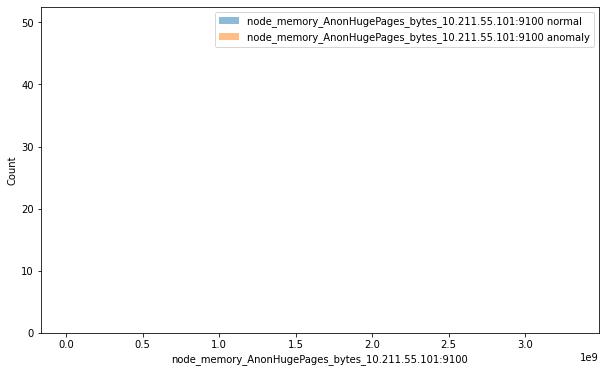

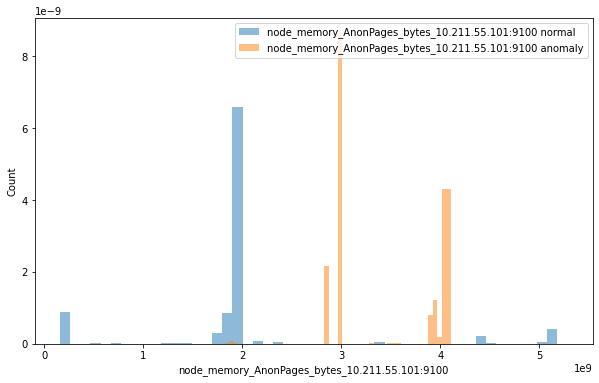

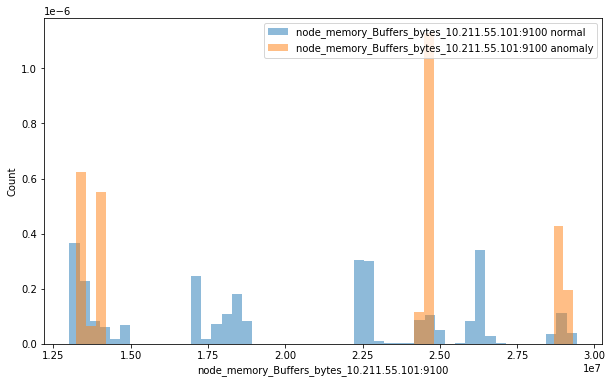

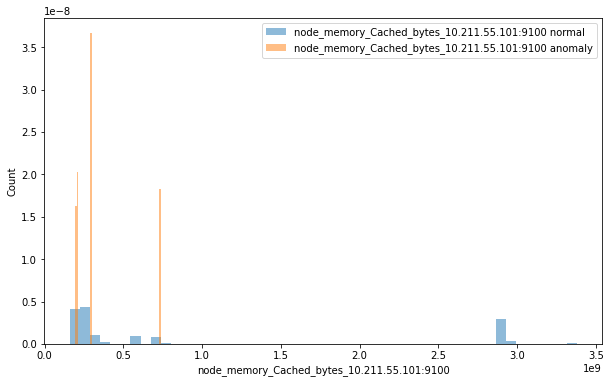

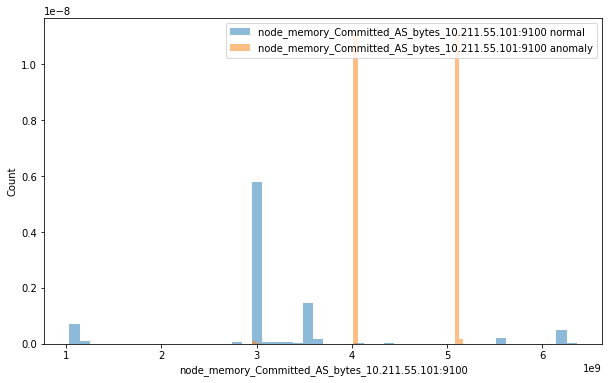

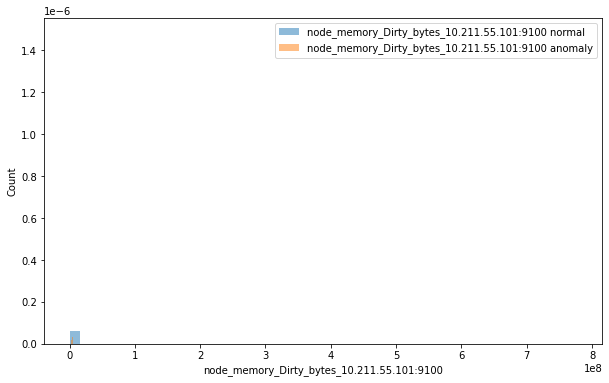

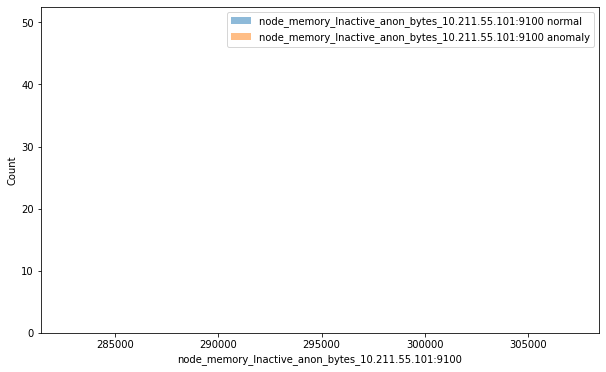

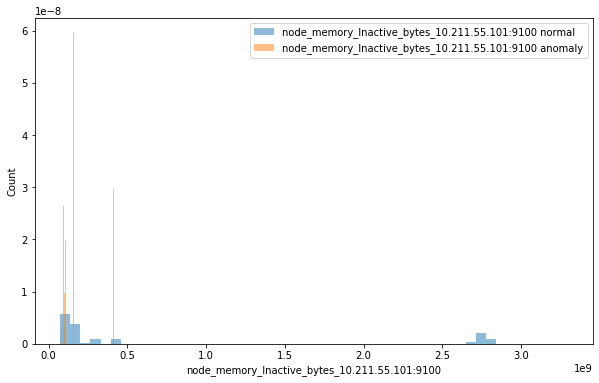

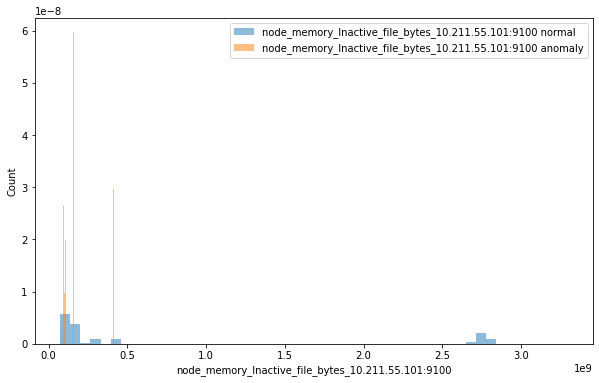

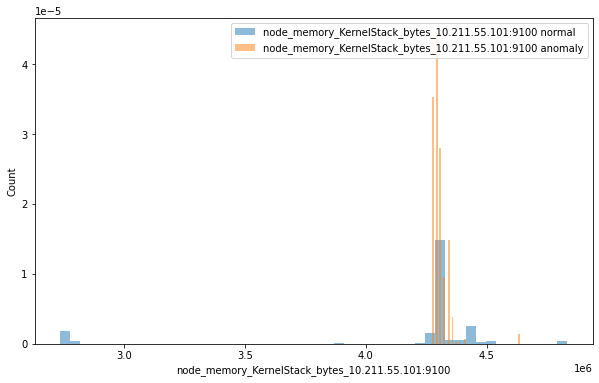

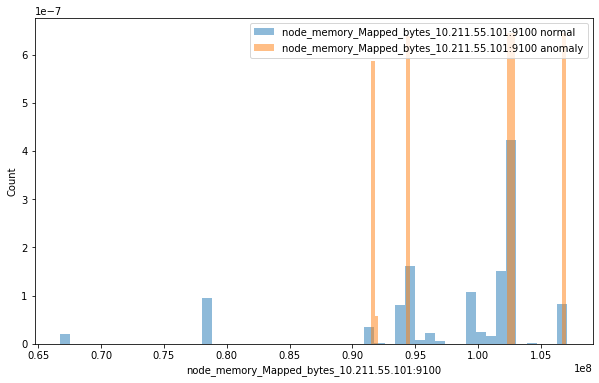

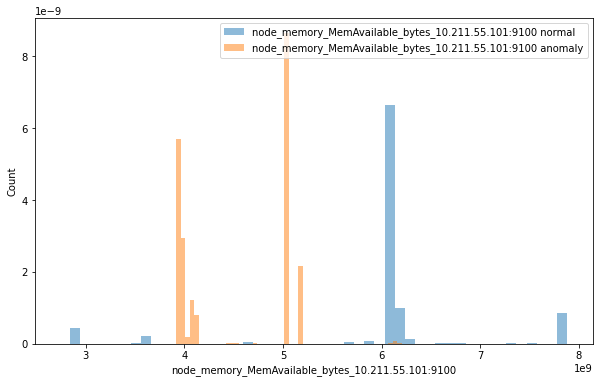

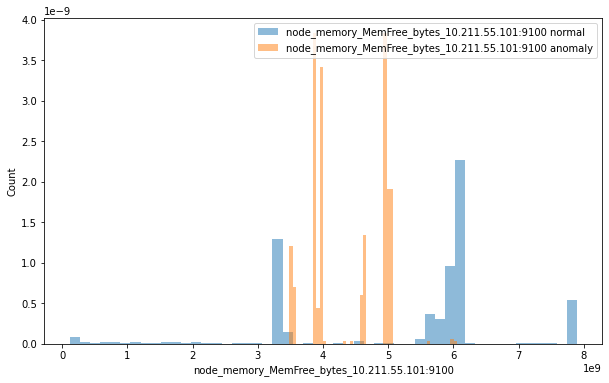

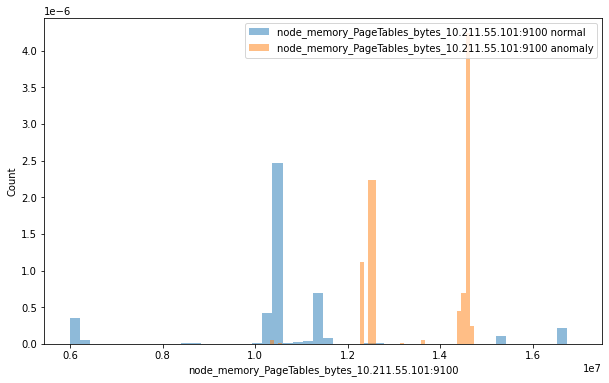

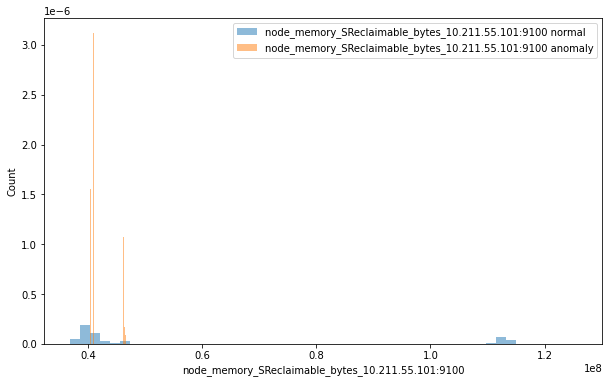

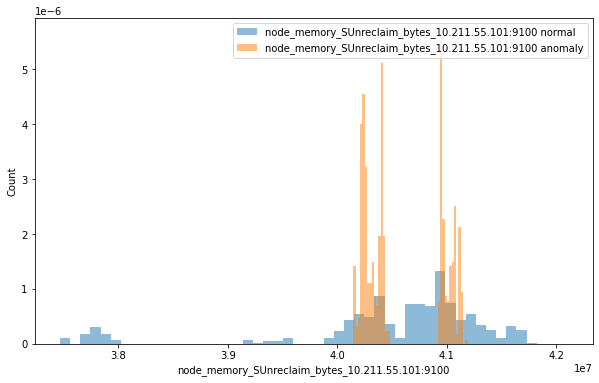

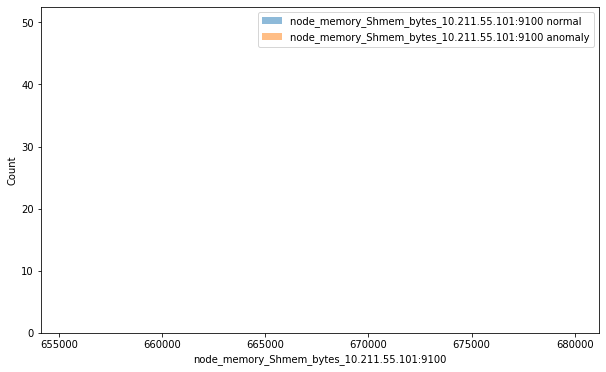

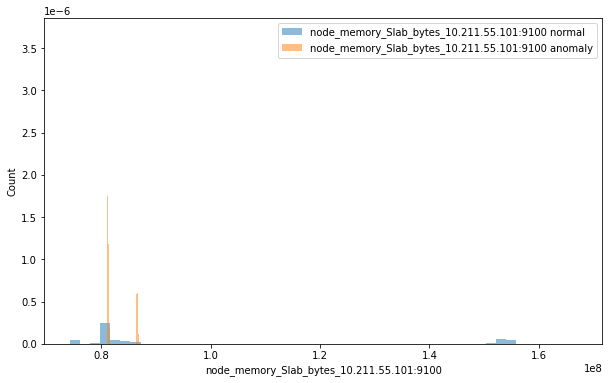

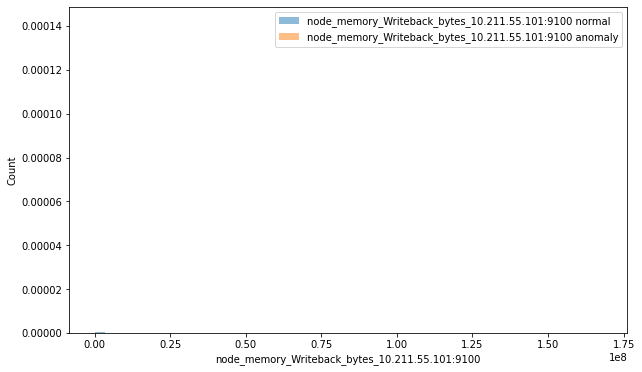

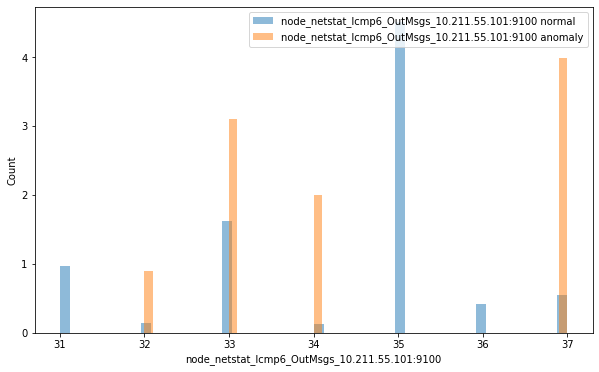

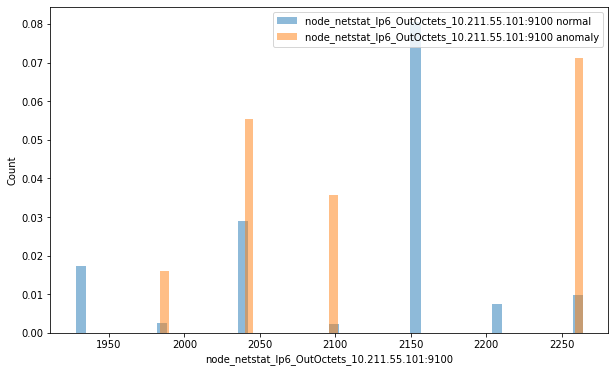

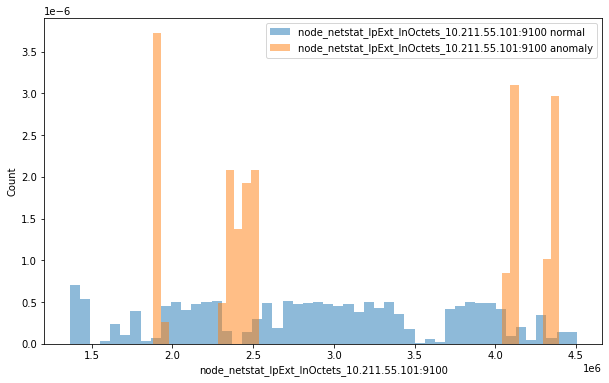

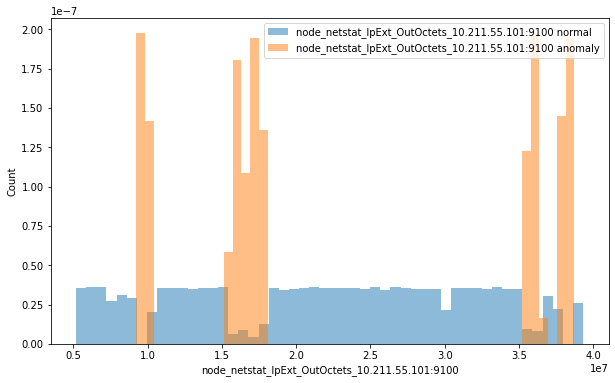

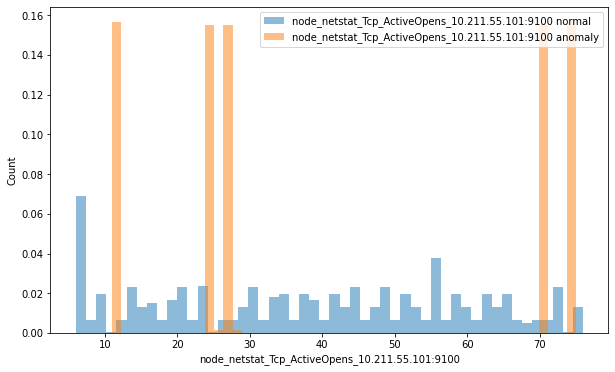

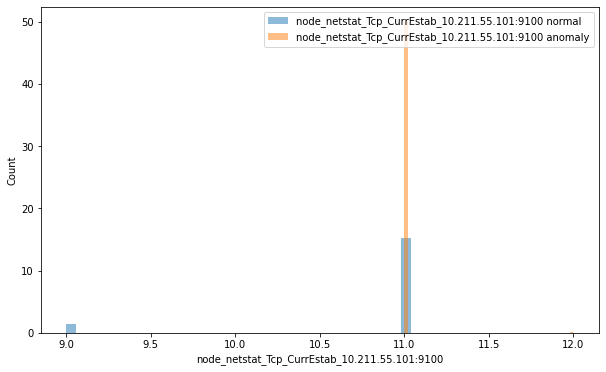

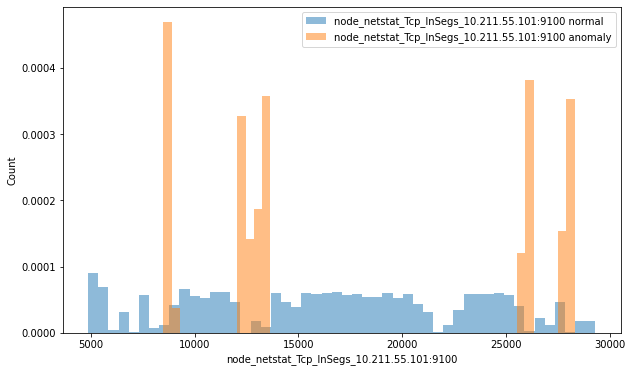

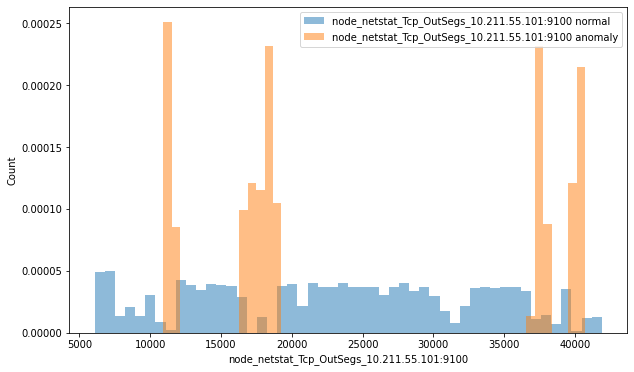

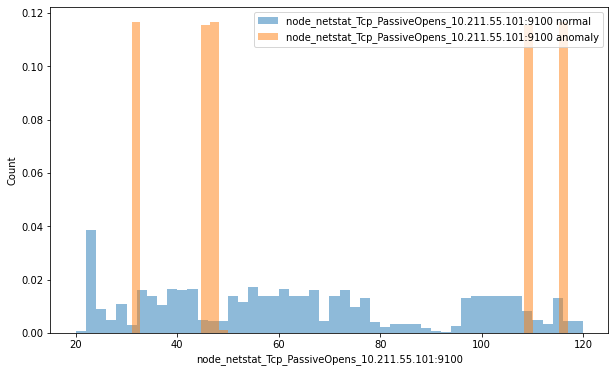

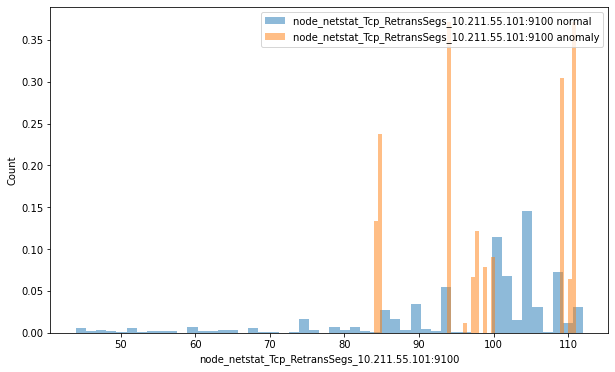

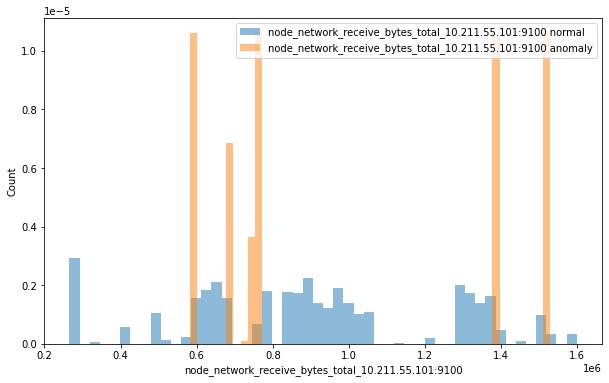

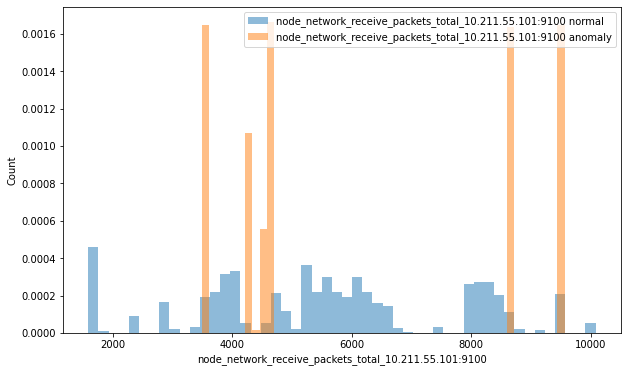

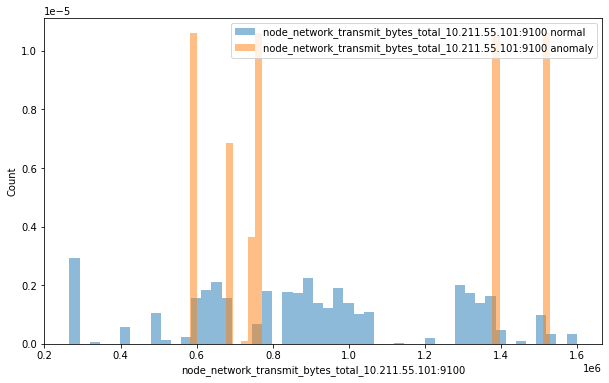

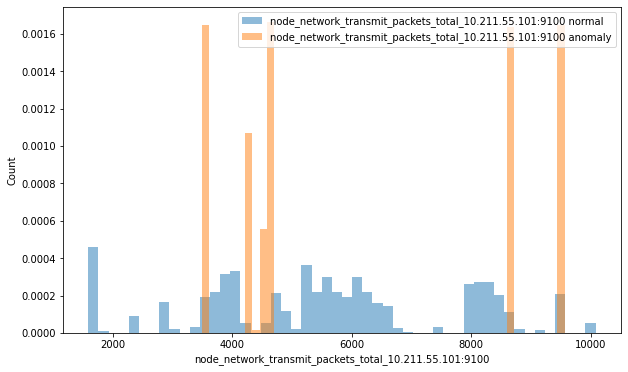

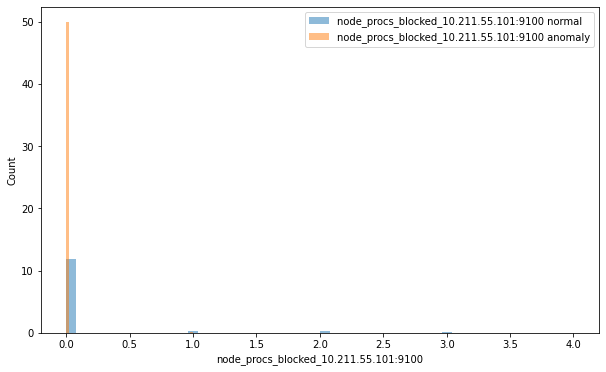

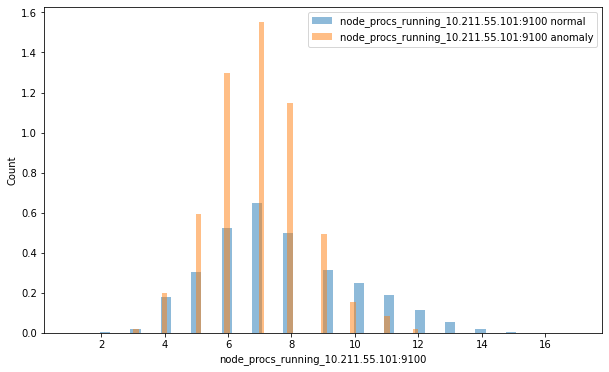

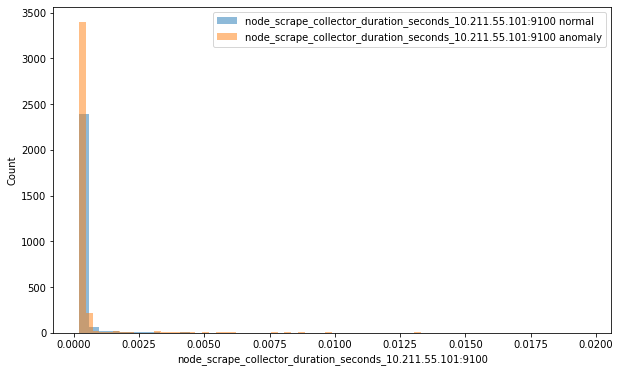

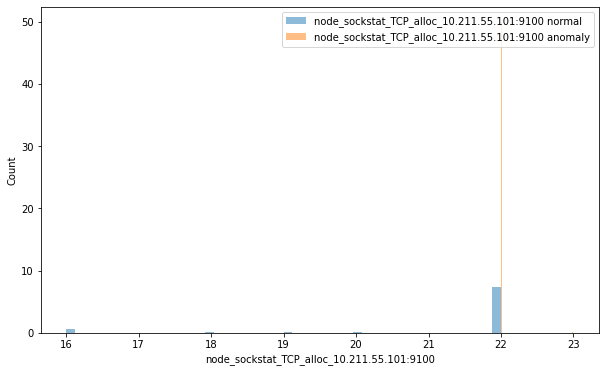

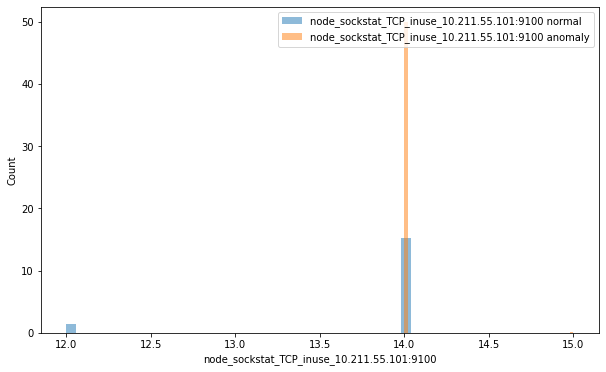

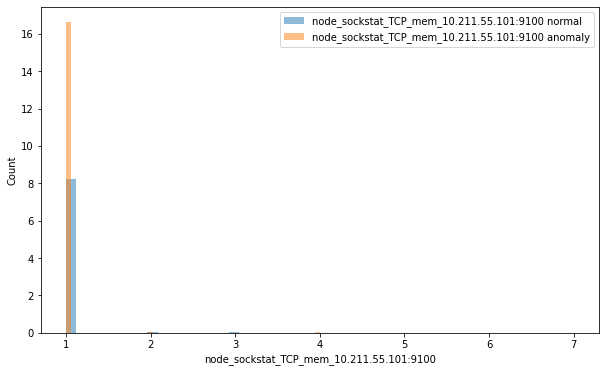

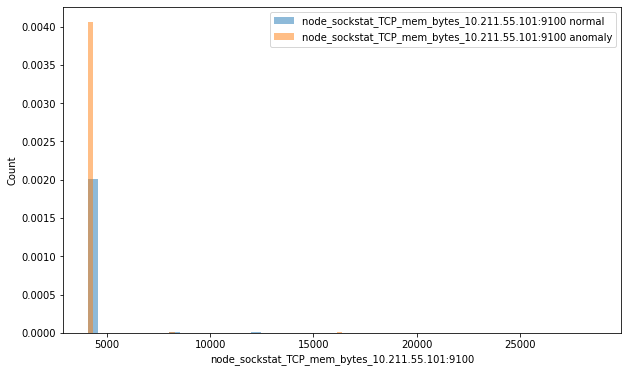

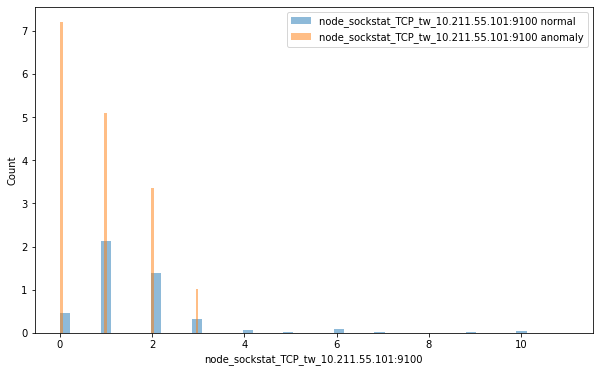

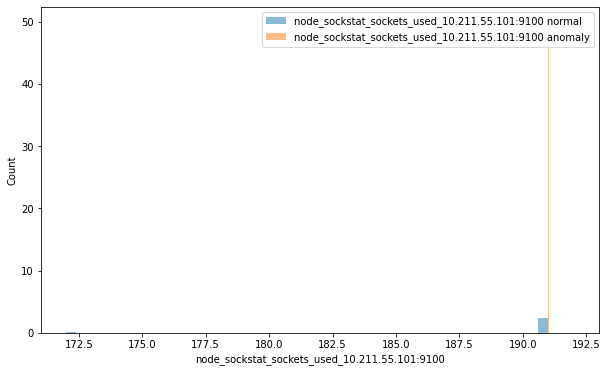

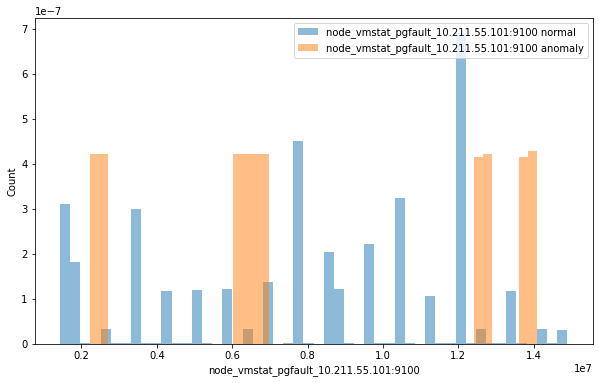

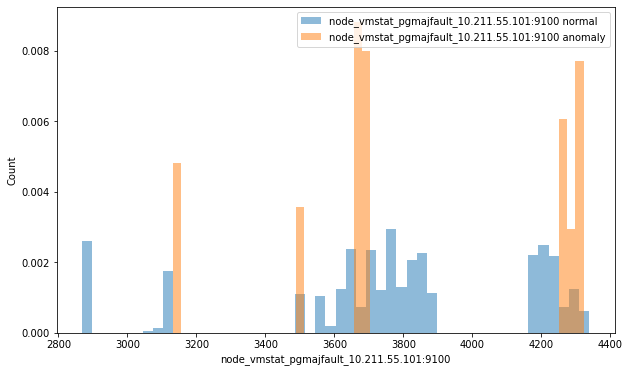

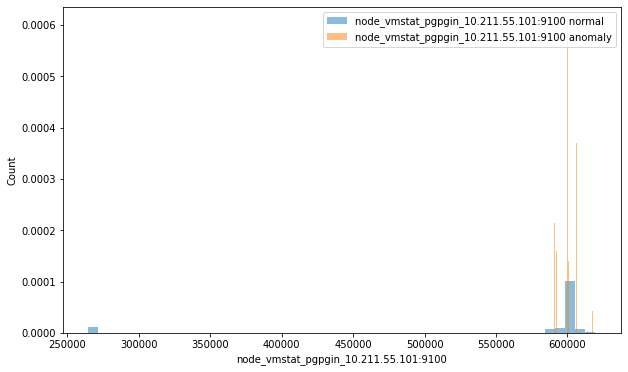

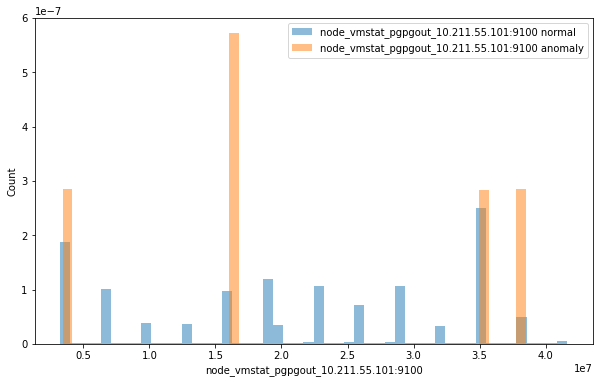

In [9]:
# Feature separability (normalized)
# print(df_plot.columns.values)
for feature in col_names_plt:
    if feature == 'time' or feature == 'anomaly' or feature == 'id':
        pass
    else:
        normal_event = df_plot.loc[df_plot['anomaly'] == "0", feature]
        anomay_event = df_plot.loc[df_plot['anomaly'] == 1, feature]

        plt.figure(figsize=(10, 6))
        plt.hist(normal_event, bins = 50, alpha=0.5, density=True,label='{} normal'.format(feature))
        plt.hist(anomay_event, bins = 50, alpha=0.5, density=True, label='{} anomaly'.format(feature))
        plt.legend(loc='upper right')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show();